# Analyse descriptive du dataset US Climate Risk

In [49]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re 
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd
from scipy import stats


### Importation des données 

In [4]:
df = pd.read_csv("U_S_Climate_Risk_Data-0.csv")

### Premiere visualisation du dataset dans sa globalité

In [5]:
df.sample(5)

,STATE,ZIP,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
9159,North Carolina,28756,85,94.7,75.8,93.5,93.6,93.6,93.9,94.2,...,0,0,0,0,0,0,0,0,0,0
627,New Hampshire,3042,53,90.8,71.0,89.6,89.6,89.9,90.3,90.3,...,60,49,36,60,52,43,60,55,48,60
21163,Illinois,61231,75,93.5,74.6,92.0,92.2,92.4,92.8,93.0,...,0,0,0,0,0,0,0,0,0,0
22865,Missouri,65281,78,95.8,76.7,94.5,94.6,94.7,95.0,95.2,...,0,0,0,0,0,0,0,0,0,0
14411,Ohio,44202,69,89.1,72.5,87.7,87.8,88.0,88.3,88.6,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.describe()

,ZIP,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,HEAT_MAGNITUDE_1995_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
count,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,...,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000
mean,49386.818408,71.323874,93.414471,73.465333,92.053757,92.211357,92.370739,92.629880,92.844799,93.068760,...,7.940571,6.365706,4.320991,8.508048,7.082102,5.292883,9.015315,7.775886,6.289279,9.431982
std,27114.212846,17.587932,5.025335,4.617065,4.977610,4.989444,4.927169,4.915433,4.973756,4.971671,...,25.381704,20.170872,15.226656,26.781160,22.099703,17.643275,28.016641,23.985493,20.181039,29.030424
min,1001.000000,6.000000,69.100000,53.400000,67.600000,67.800000,67.700000,68.000000,68.500000,68.700000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26806.250000,59.000000,90.300000,71.000000,89.000000,89.100000,89.300000,89.600000,89.800000,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49452.500000,72.000000,93.200000,74.100000,91.900000,92.000000,92.200000,92.500000,92.700000,92.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,71674.250000,85.000000,96.400000,77.000000,95.100000,95.200000,95.300000,95.600000,95.800000,96.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99403.000000,100.000000,114.700000,81.600000,113.600000,114.000000,114.000000,114.200000,114.400000,114.600000,...,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000


Il y a 441 colonnes donc beaucoup d'entre elles n'apparaissent pas lorsqu'on affiche notre dataset. \
On a 2 types de features :

Une quarantaine de features divisés en 18 colonnes de 1970 à 2060 avec un pas de 5 ans, par exemple : 
 - HEAT_MAGNITUDE_1970 , HEAT_MAGNITUDE_1975, HEAT_MAGNITUDE_1980, ... , HEAT_MAGNITUDE_2060 

- HEAT_WETBULB_MAGNITUDE_1970_F ... HEAT_WETBULB_MAGNITUDE_2060_F
- ...

Des features pas temporel tel que : 
- PRECIP_RATING
- DROUGHT_RATING
- FIRE_FLEP_8

Donc en tout on a une trentaine de "caractéristique" observés sur des échelles de temps différentes ou non

In [7]:
df.columns.nunique()

441

OK pas de doublons dans le dataset !

In [8]:
columns_2020 = np.array([col for col in df.columns if "_2020" in col])
columns_2020 , len(columns_2020)

(array(['HEAT_MAGNITUDE_2020_RCP45_F', 'HEAT_MAGNITUDE_2020_RCP85_F',
        'HEAT_EVENTS_2020_RCP45', 'HEAT_EVENTS_2020_RCP85',
        'HEAT_WETBULB_MAGNITUDE_2020_RCP45_F',
        'HEAT_WETBULB_MAGNITUDE_2020_RCP85_F',
        'HEAT_WETBULB_EVENTS_2020_RCP45', 'HEAT_WETBULB_EVENTS_2020_RCP85',
        'PRECIP_EVENTS_2020_RCP45', 'PRECIP_EVENTS_2020_RCP85',
        'PRECIP_TOTALS_2020_RCP45_IN', 'PRECIP_TOTALS_2020_RCP85_IN',
        'PRECIP_ANNUAL_2020_RCP45_IN', 'PRECIP_ANNUAL_2020_RCP85_IN',
        'DROUGHT_WASSI_2020_RCP85', 'DROUGHT_WASSI_2020_RCP45',
        'DROUGHT_LENGTH_2020_MONTHS', 'DROUGHT_MAGNITUDE_2020',
        'DROUGHT_FREQUENCY_2020', 'FIRE_MAGNITUDE_2020_RCP85_FWI',
        'FIRE_MAGNITUDE_2020_RCP45_FWI', 'FIRE_EVENTS_2020_RCP85',
        'FIRE_EVENTS_2020_RCP45', 'FLOOD_TIDAL_EVENTS_2020',
        'FLOOD_TIDAL_EVENTS_2020_P25', 'FLOOD_TIDAL_EVENTS_2020_P75'],
       dtype='<U35'),
 26)

Amélioration : <span style="color: red">Chercher la différentre entre RCP45 et  RCP85</span> 

Réponse Quentin : 
Dans la description de la structure du dataset il n'y a rien de mentionné en termes de différences, les deux correspondent par exemple pour "HEAT_MAGNITUDE_2020_RCP45_F" et "HEAT_MAGNITUDE_2020_RCP85_F" au 98e percentile des températures maximales quotidiennes : moyenne autour de l'année cible

Après des recherches les RCP (Representative Concentration Pathways) sont  des scénarios de forçage radiatif qui décrivent la quantité de gaz à effet de serre dans l'atmosphère à différentes périodes dans le futur, mesurée en W/m². Ainsi :
- RCP45 : Ce scénario correspond à un niveau de concentration intermédiaire de gaz à effet de serre, avec un forçage radiatif de 4,5 W/m²
- RCP85 : Ce scénario correspond à un niveau de concentration intermédiaire de gaz à effet de serre, avec un forçage radiatif de 8,5 W/m²

<u>CCL</u> : RCP45 = scénario de faible émission / RCP85 = scénario de forte émission



In [9]:
columns_1970 = np.array([col for col in df.columns if "_1970" in col])
columns_1970 , len(columns_1970)

(array(['HEAT_MAGNITUDE_1970_F', 'HEAT_EVENTS_1970',
        'HEAT_WETBULB_MAGNITUDE_1970_F', 'HEAT_WETBULB_EVENTS_1970',
        'PRECIP_EVENTS_1970', 'PRECIP_TOTALS_1970_IN',
        'PRECIP_ANNUAL_1970_IN', 'DROUGHT_LENGTH_1970_MONTHS',
        'DROUGHT_MAGNITUDE_1970', 'DROUGHT_FREQUENCY_1970',
        'FIRE_MAGNITUDE_1970_FWI', 'FIRE_EVENTS_1970'], dtype='<U29'),
 12)

Remarque : 
- On a pas la présence des RCP.. c'est qu'à partir de 2020 (des années 2000 de manière général desfois 2005), peut être que c'est une histoire de si c'est une estimation ou une donnée historique, ** A CREUSER **
- Moins de colonne en 1970 qu'en 2020, en effet certaines variable comme DROUGHT_WASSI_2015 ou FLOOD_TIDAL_EVENTS_2010 commencent leurs données dans les années 2000

### Analyse des ZIP

In [10]:
df.loc[:,"ZIP"].nunique()

33300

Les ZIP sont uniques

### Analyse de quelques features

Création d'une fonction qui renvoie l'histogramme des colonnes commençant par START_NAME, très utile pour l'affichage des features avec une progression temporelle

In [11]:
def plot_startbyname_histograms(df,start_name):
    # Sélectionner toutes les colonnes qui commencent par 'start_name'
    h_columns = df.filter(regex=f"^{start_name}").columns
    print(h_columns)
    h_columns = [x for x in h_columns if not re.search(r'RCP85', x)] #en enlevent les RCP85

    # Calculer la disposition de la grille pour l'affichage
    n_cols = 4  # nombre de colonnes dans la grille
    n_rows = (len(h_columns) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

    # Créer une figure avec des sous-graphiques
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Aplatir pour itérer facilement

    # Tracer chaque histogramme dans un sous-graphe
    for i, col in enumerate(h_columns):
        df[col].plot(kind="hist", bins=100, ax=axes[i], title=f"Histogramme de {col}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Fréquence")
 
    
    # Supprimer les sous-graphiques vides (si le nombre de colonnes n'est pas un multiple de n_cols)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

Création de la même fonction mais qui compare les cas RCP45 et RCP85 pour voir si y'a une diff


In [12]:
def plot_startbyname_histograms_superposed(df, start_name):
    # Sélectionner toutes les colonnes qui commencent par 'start_name'
    h_columns = df.filter(regex=f"^{start_name}").columns
    #print(h_columns)

    # Diviser les colonnes en deux groupes : RCP45 et RCP85
    rcp45_columns = [col for col in h_columns if "RCP45" in col]
    rcp85_columns = [col for col in h_columns if "RCP85" in col]
    #print(rcp45_columns)
    #print(rcp85_columns)

    # Calculer la disposition de la grille pour l'affichage
    n_cols = 4  # nombre de colonnes dans la grille
    if len(rcp45_columns) == len(rcp85_columns):
        n_rows = (len(rcp45_columns) + n_cols - 1) // n_cols  # nombre de lignes nécessaires
    else :
        n_rows = ((max(len(rcp45_columns), len(rcp85_columns))) + n_cols - 1) // n_cols

    # Créer une figure avec des sous-graphiques
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Aplatir pour itérer facilement

    # Tracer chaque histogramme dans un sous-graphe
    pair_columns = list(zip(rcp45_columns, rcp85_columns))
    #print(pair_columns)
    for i, (base_col1,base_col2) in enumerate(pair_columns):
        # Tracer les histogrammes sur le même graphique

        if base_col1 in df.columns:
            df[base_col1].plot(kind="hist", bins=100, ax=axes[i], color="green", alpha=0.5, label="RCP45")
        if base_col2 in df.columns:
            df[base_col2].plot(kind="hist", bins=100, ax=axes[i], color="red", alpha=0.5, label="RCP85")
        
        #axes[i].set_title(f"Histogramme de {base_col1} et {base_col2}")
        axes[i].set_xlabel(f" {str(base_col1)}, {str(base_col2)}")
        axes[i].set_ylabel("Fréquence")
        #print(f" col1 {base_col1}")
        #print(f" col2 {base_col2}")

    # Supprimer les sous-graphiques vides (si le nombre de colonnes n'est pas un multiple de n_cols)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

Création d'une fonction qui pour chaque colonne indexé par le temps renvoie un graphique de l'évolution de la moyenne par rapport au temps.

In [13]:
def plot_mean_over_time(df,start_name):
    # Filtrer les colonnes qui commencent par start_name
    h_columns = df.filter(regex=f"^{start_name}").columns
    
    h_columns = [x for x in h_columns if not re.search(r'RCP85', x)] #en enlevent les RCP85
    print(h_columns)
    # Calculer la moyenne de chaque colonne 
    mean_values = [df[col].mean() for col in h_columns]

    pattern = r'\d{4}'
    years = np.unique(np.array([re.findall(pattern,element) for element in h_columns if re.search(pattern, element)]))
    #print(years)
    years = [int(i) for i in years]
    #print(years)
 


    # Créer une figure avec des sous-graphiques

    plt.plot(years, mean_values, marker='o', linestyle='-', color='b')
    plt.title(f"Évolution de la moyenne des {start_name} au fil du temps")
    plt.xlabel("Année")
    plt.ylabel(f"Moyenne {start_name}")
    plt.grid(True)
    plt.show()


Création d'une fonction qui pour chaque colonne indexé par le temps renvoie un graphique de l'évolution de la moyenne par rapport au temps selon si la variable est normal, RCP45 ou RCP85

In [14]:
def plot_mean_over_time_superposed(df,start_name):
    # Filtrer les colonnes qui commencent par start_name
    h_columns = df.filter(regex=f"^{start_name}").columns
    
    h_columns_RCP45 = [x for x in h_columns if "RCP45" in x] #on conserve que les RCP45
    h_columns_RCP85 = [x for x in h_columns if "RCP85" in x] #on conserve que les RCP85
    h_columns = [x for x in h_columns if not re.search(r'RCP85', x) and not re.search(r'RCP45',x)] #en enlevent les RCP85 et RCP45
    h_columns_RCP45 = h_columns + h_columns_RCP45
    h_columns_RCP85 = h_columns + h_columns_RCP85

    # Calculer la moyenne de chaque colonne 
    mean_values = [df[col].mean() for col in h_columns]
    mean_values_RCP45 = [df[col].mean() for col in h_columns_RCP45]
    mean_values_RCP85 = [df[col].mean() for col in h_columns_RCP85]
    

    pattern = r'\d{4}'
    years = np.unique(np.array([re.findall(pattern,element) for element in h_columns_RCP45 if re.search(pattern, element)]))
    #print(years)
    years = [int(i) for i in years]
    #print(years)

    #Création de la figure avec les 2 courbes superposées
    plt.plot(years, mean_values_RCP45, marker='o', linestyle='-', color='red', label=f'Moyenne {start_name}_RCP45')
    plt.plot(years, mean_values_RCP85, marker='o', linestyle='-', color='blue', label=f'Moyenne {start_name}_RCP85')
 
    # Ajouter un titre, des labels et une légende
    plt.title(f"Évolution de la moyenne des {start_name} au fil du temps")
    plt.xlabel("Année")
    plt.ylabel(f"Moyenne {start_name}")
    plt.grid(True)
    plt.legend()  # Afficher la légende pour distinguer les deux courbes
    plt.show()

In [15]:
df_by_state = df.groupby("STATE").mean().drop("ZIP", axis=1)
df_by_state = df_by_state.reset_index()
    
df_by_state.sample(4)


,STATE,HEAT_RATING,HEAT_THRESHOLD_F,HEAT_WETBULB_THRESHOLD_F,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,HEAT_MAGNITUDE_1995_F,...,FLOOD_TIDAL_EVENTS_2070_P75,FLOOD_TIDAL_EVENTS_2080,FLOOD_TIDAL_EVENTS_2080_P25,FLOOD_TIDAL_EVENTS_2080_P75,FLOOD_TIDAL_EVENTS_2090,FLOOD_TIDAL_EVENTS_2090_P25,FLOOD_TIDAL_EVENTS_2090_P75,FLOOD_TIDAL_EVENTS_2100,FLOOD_TIDAL_EVENTS_2100_P25,FLOOD_TIDAL_EVENTS_2100_P75
38,South Carolina,87.799528,96.601179,77.904717,95.373585,95.524764,95.554953,95.782783,96.095047,96.322642,...,16.70283,12.792453,7.209906,18.132075,14.339623,9.242925,19.330189,15.959906,11.516509,20.398585
15,Kentucky,84.212276,93.132481,75.112660,91.776087,91.908440,92.050384,92.269949,92.561253,92.830051,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
40,Tennessee,88.489731,94.229226,75.988310,92.948341,93.067299,93.137283,93.361769,93.664297,93.856240,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
37,Rhode Island,53.800000,88.536250,72.078750,87.572500,87.581250,87.898750,88.070000,88.020000,88.206250,...,29.68750,21.887500,11.687500,32.150000,24.900000,15.887500,34.225000,27.775000,20.012500,35.950000


In [16]:
#telechargable ici https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2023&layergroup=States+%28and+equivalent%29
def plot_map_feature(feature_name, color = "Blues"):
    url = 'maps/tl_2023_us_state.shp' 
    gdf = gpd.read_file(url)
    merged = gdf.merge(df_by_state, left_on="NAME", right_on="STATE", how="right")
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    merged.boundary.plot(ax=ax)
    merged.plot(column=feature_name, cmap=color, legend=True, ax=ax,
                    legend_kwds={'label': feature_name})
    



### HEAT 

Chaque ville a une "note de chaleur" entre 0 et 100 donnée par ClimateCheck qui correspond au risque de chaleur.

In [17]:
df.loc[:,"HEAT_RATING"].describe()

count    33300.000000
mean        71.323874
std         17.587932
min          6.000000
25%         59.000000
50%         72.000000
75%         85.000000
max        100.000000
Name: HEAT_RATING, dtype: float64

#### 1.1 HEAT_MAGNITUDE : 98th percentile of daily max temperatures: average around target year

Index(['HEAT_MAGNITUDE_1970_F', 'HEAT_MAGNITUDE_1975_F',
       'HEAT_MAGNITUDE_1980_F', 'HEAT_MAGNITUDE_1985_F',
       'HEAT_MAGNITUDE_1990_F', 'HEAT_MAGNITUDE_1995_F',
       'HEAT_MAGNITUDE_2000_F', 'HEAT_MAGNITUDE_2005_RCP45_F',
       'HEAT_MAGNITUDE_2010_RCP45_F', 'HEAT_MAGNITUDE_2015_RCP45_F',
       'HEAT_MAGNITUDE_2020_RCP45_F', 'HEAT_MAGNITUDE_2025_RCP45_F',
       'HEAT_MAGNITUDE_2030_RCP45_F', 'HEAT_MAGNITUDE_2035_RCP45_F',
       'HEAT_MAGNITUDE_2040_RCP45_F', 'HEAT_MAGNITUDE_2045_RCP45_F',
       'HEAT_MAGNITUDE_2050_RCP45_F', 'HEAT_MAGNITUDE_2055_RCP45_F',
       'HEAT_MAGNITUDE_2060_RCP45_F', 'HEAT_MAGNITUDE_2005_RCP85_F',
       'HEAT_MAGNITUDE_2010_RCP85_F', 'HEAT_MAGNITUDE_2015_RCP85_F',
       'HEAT_MAGNITUDE_2020_RCP85_F', 'HEAT_MAGNITUDE_2025_RCP85_F',
       'HEAT_MAGNITUDE_2030_RCP85_F', 'HEAT_MAGNITUDE_2035_RCP85_F',
       'HEAT_MAGNITUDE_2040_RCP85_F', 'HEAT_MAGNITUDE_2045_RCP85_F',
       'HEAT_MAGNITUDE_2050_RCP85_F', 'HEAT_MAGNITUDE_2055_RCP85_F',
       

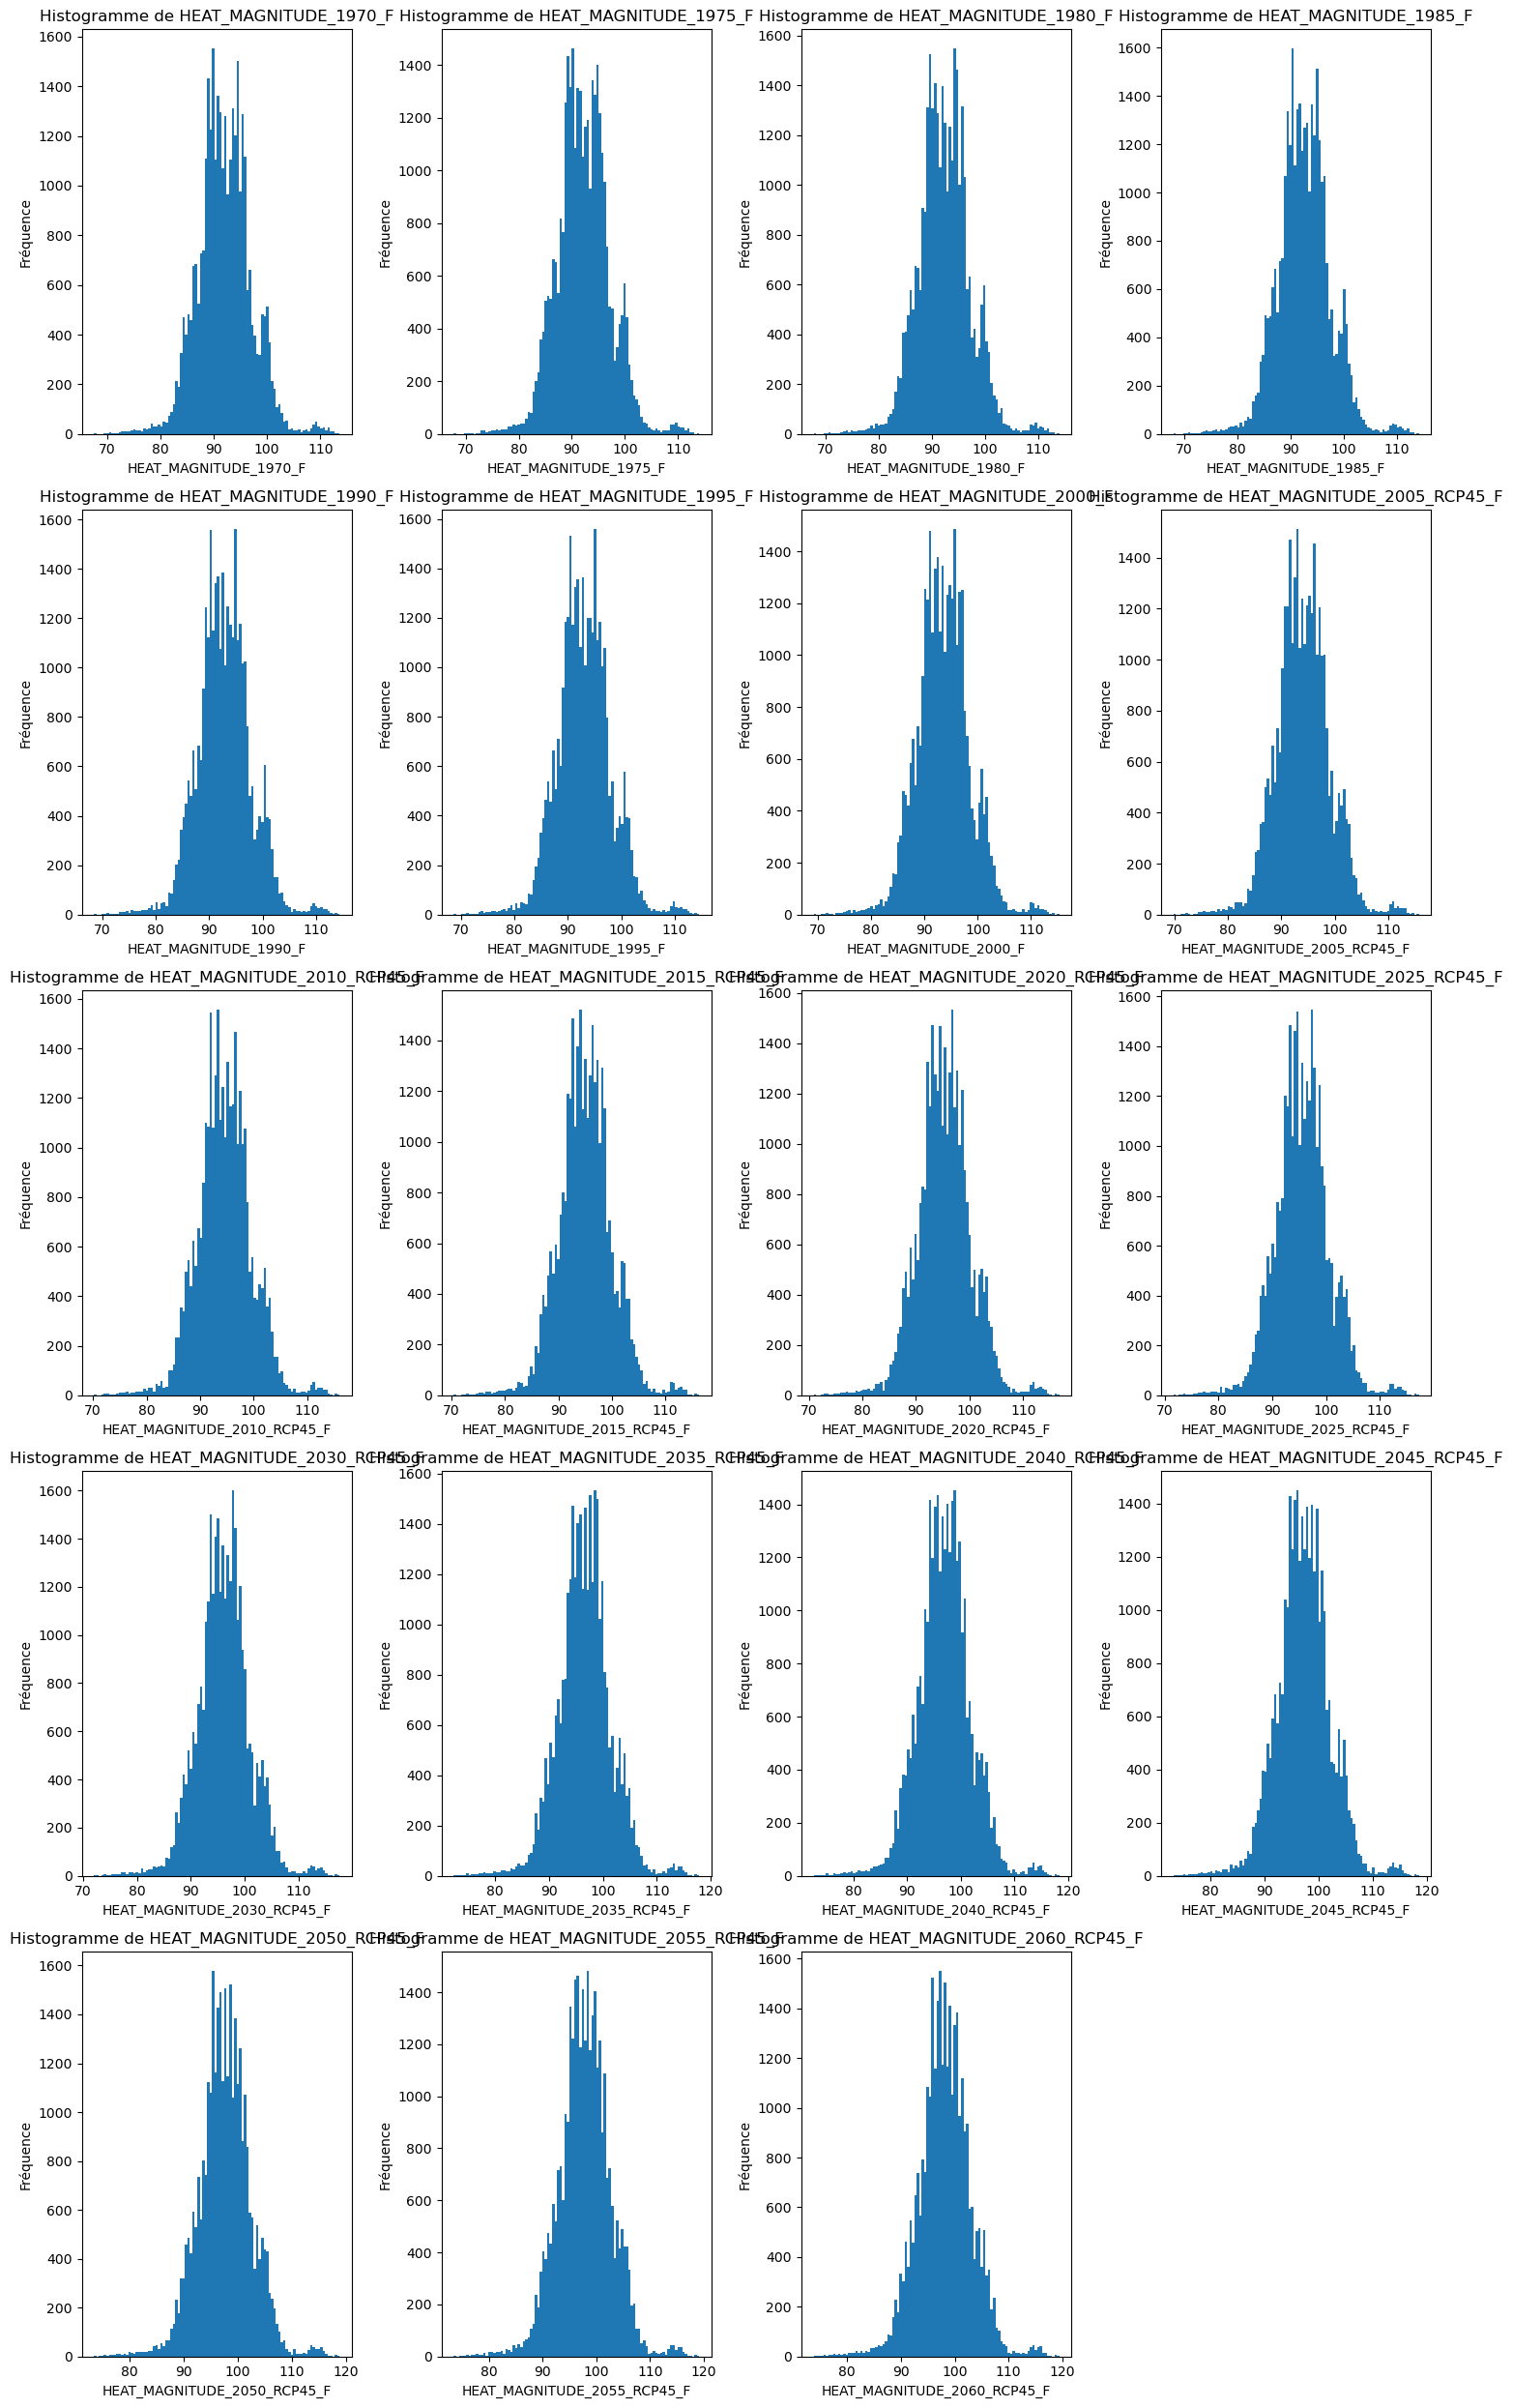

In [18]:
# Utilisation de la fonction
plot_startbyname_histograms(df, "HEAT_MAGNITUDE")

Cela semble suivre une loi normale... Je vais donc créer ci-dessous une fonction qui pour chaques variables au cours du temps (HEAT_MAGNITUDE_1970_F, ..., HEAT_MAGNITUDE_2060_RCP45_F) trouve la loi normale que cette dernière suit de manière approximative

In [47]:
def plot_startbyname_histograms_with_normal_fit(df, start_name):
    # Sélectionner toutes les colonnes qui commencent par 'start_name'
    h_columns = df.filter(regex=f"^{start_name}").columns
    #print(h_columns)
    h_columns = [x for x in h_columns if not re.search(r'RCP85', x)] #en enlevent les RCP85

    # Calculer la disposition de la grille pour l'affichage
    n_cols = 4  # nombre de colonnes dans la grille
    n_rows = (len(h_columns) + n_cols - 1) // n_cols  # nombre de lignes nécessaires

    # Créer une figure avec des sous-graphiques
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Aplatir pour itérer facilement

    # Tracer chaque histogramme et ajuster une loi normale
    for i, col in enumerate(h_columns):
        # Tracer l'histogramme
        df[col].plot(kind="hist", bins=100, ax=axes[i], title=f"Histogramme de {col}", density=True)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Fréquence")

        # Estimation des paramètres de la loi normale
        mu, std = stats.norm.fit(df[col])

        # Tracer la courbe de la loi normale ajustée
        xmin, xmax = axes[i].get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)  # Calculer la densité de probabilité
        axes[i].plot(x, p, 'k', linewidth=2)  # Tracer la courbe de la loi normale

        # Afficher les paramètres de la loi normale
        axes[i].text(0.5, 0.95, f'$\mu={mu:.2f}$\n$\sigma={std:.2f}$', transform=axes[i].transAxes,
                     horizontalalignment='center', verticalalignment='top', fontsize=12, color='black')

    # Supprimer les sous-graphiques vides (si le nombre de colonnes n'est pas un multiple de n_cols)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

Index(['HEAT_MAGNITUDE_1970_F', 'HEAT_MAGNITUDE_1975_F',
       'HEAT_MAGNITUDE_1980_F', 'HEAT_MAGNITUDE_1985_F',
       'HEAT_MAGNITUDE_1990_F', 'HEAT_MAGNITUDE_1995_F',
       'HEAT_MAGNITUDE_2000_F', 'HEAT_MAGNITUDE_2005_RCP45_F',
       'HEAT_MAGNITUDE_2010_RCP45_F', 'HEAT_MAGNITUDE_2015_RCP45_F',
       'HEAT_MAGNITUDE_2020_RCP45_F', 'HEAT_MAGNITUDE_2025_RCP45_F',
       'HEAT_MAGNITUDE_2030_RCP45_F', 'HEAT_MAGNITUDE_2035_RCP45_F',
       'HEAT_MAGNITUDE_2040_RCP45_F', 'HEAT_MAGNITUDE_2045_RCP45_F',
       'HEAT_MAGNITUDE_2050_RCP45_F', 'HEAT_MAGNITUDE_2055_RCP45_F',
       'HEAT_MAGNITUDE_2060_RCP45_F', 'HEAT_MAGNITUDE_2005_RCP85_F',
       'HEAT_MAGNITUDE_2010_RCP85_F', 'HEAT_MAGNITUDE_2015_RCP85_F',
       'HEAT_MAGNITUDE_2020_RCP85_F', 'HEAT_MAGNITUDE_2025_RCP85_F',
       'HEAT_MAGNITUDE_2030_RCP85_F', 'HEAT_MAGNITUDE_2035_RCP85_F',
       'HEAT_MAGNITUDE_2040_RCP85_F', 'HEAT_MAGNITUDE_2045_RCP85_F',
       'HEAT_MAGNITUDE_2050_RCP85_F', 'HEAT_MAGNITUDE_2055_RCP85_F',
       

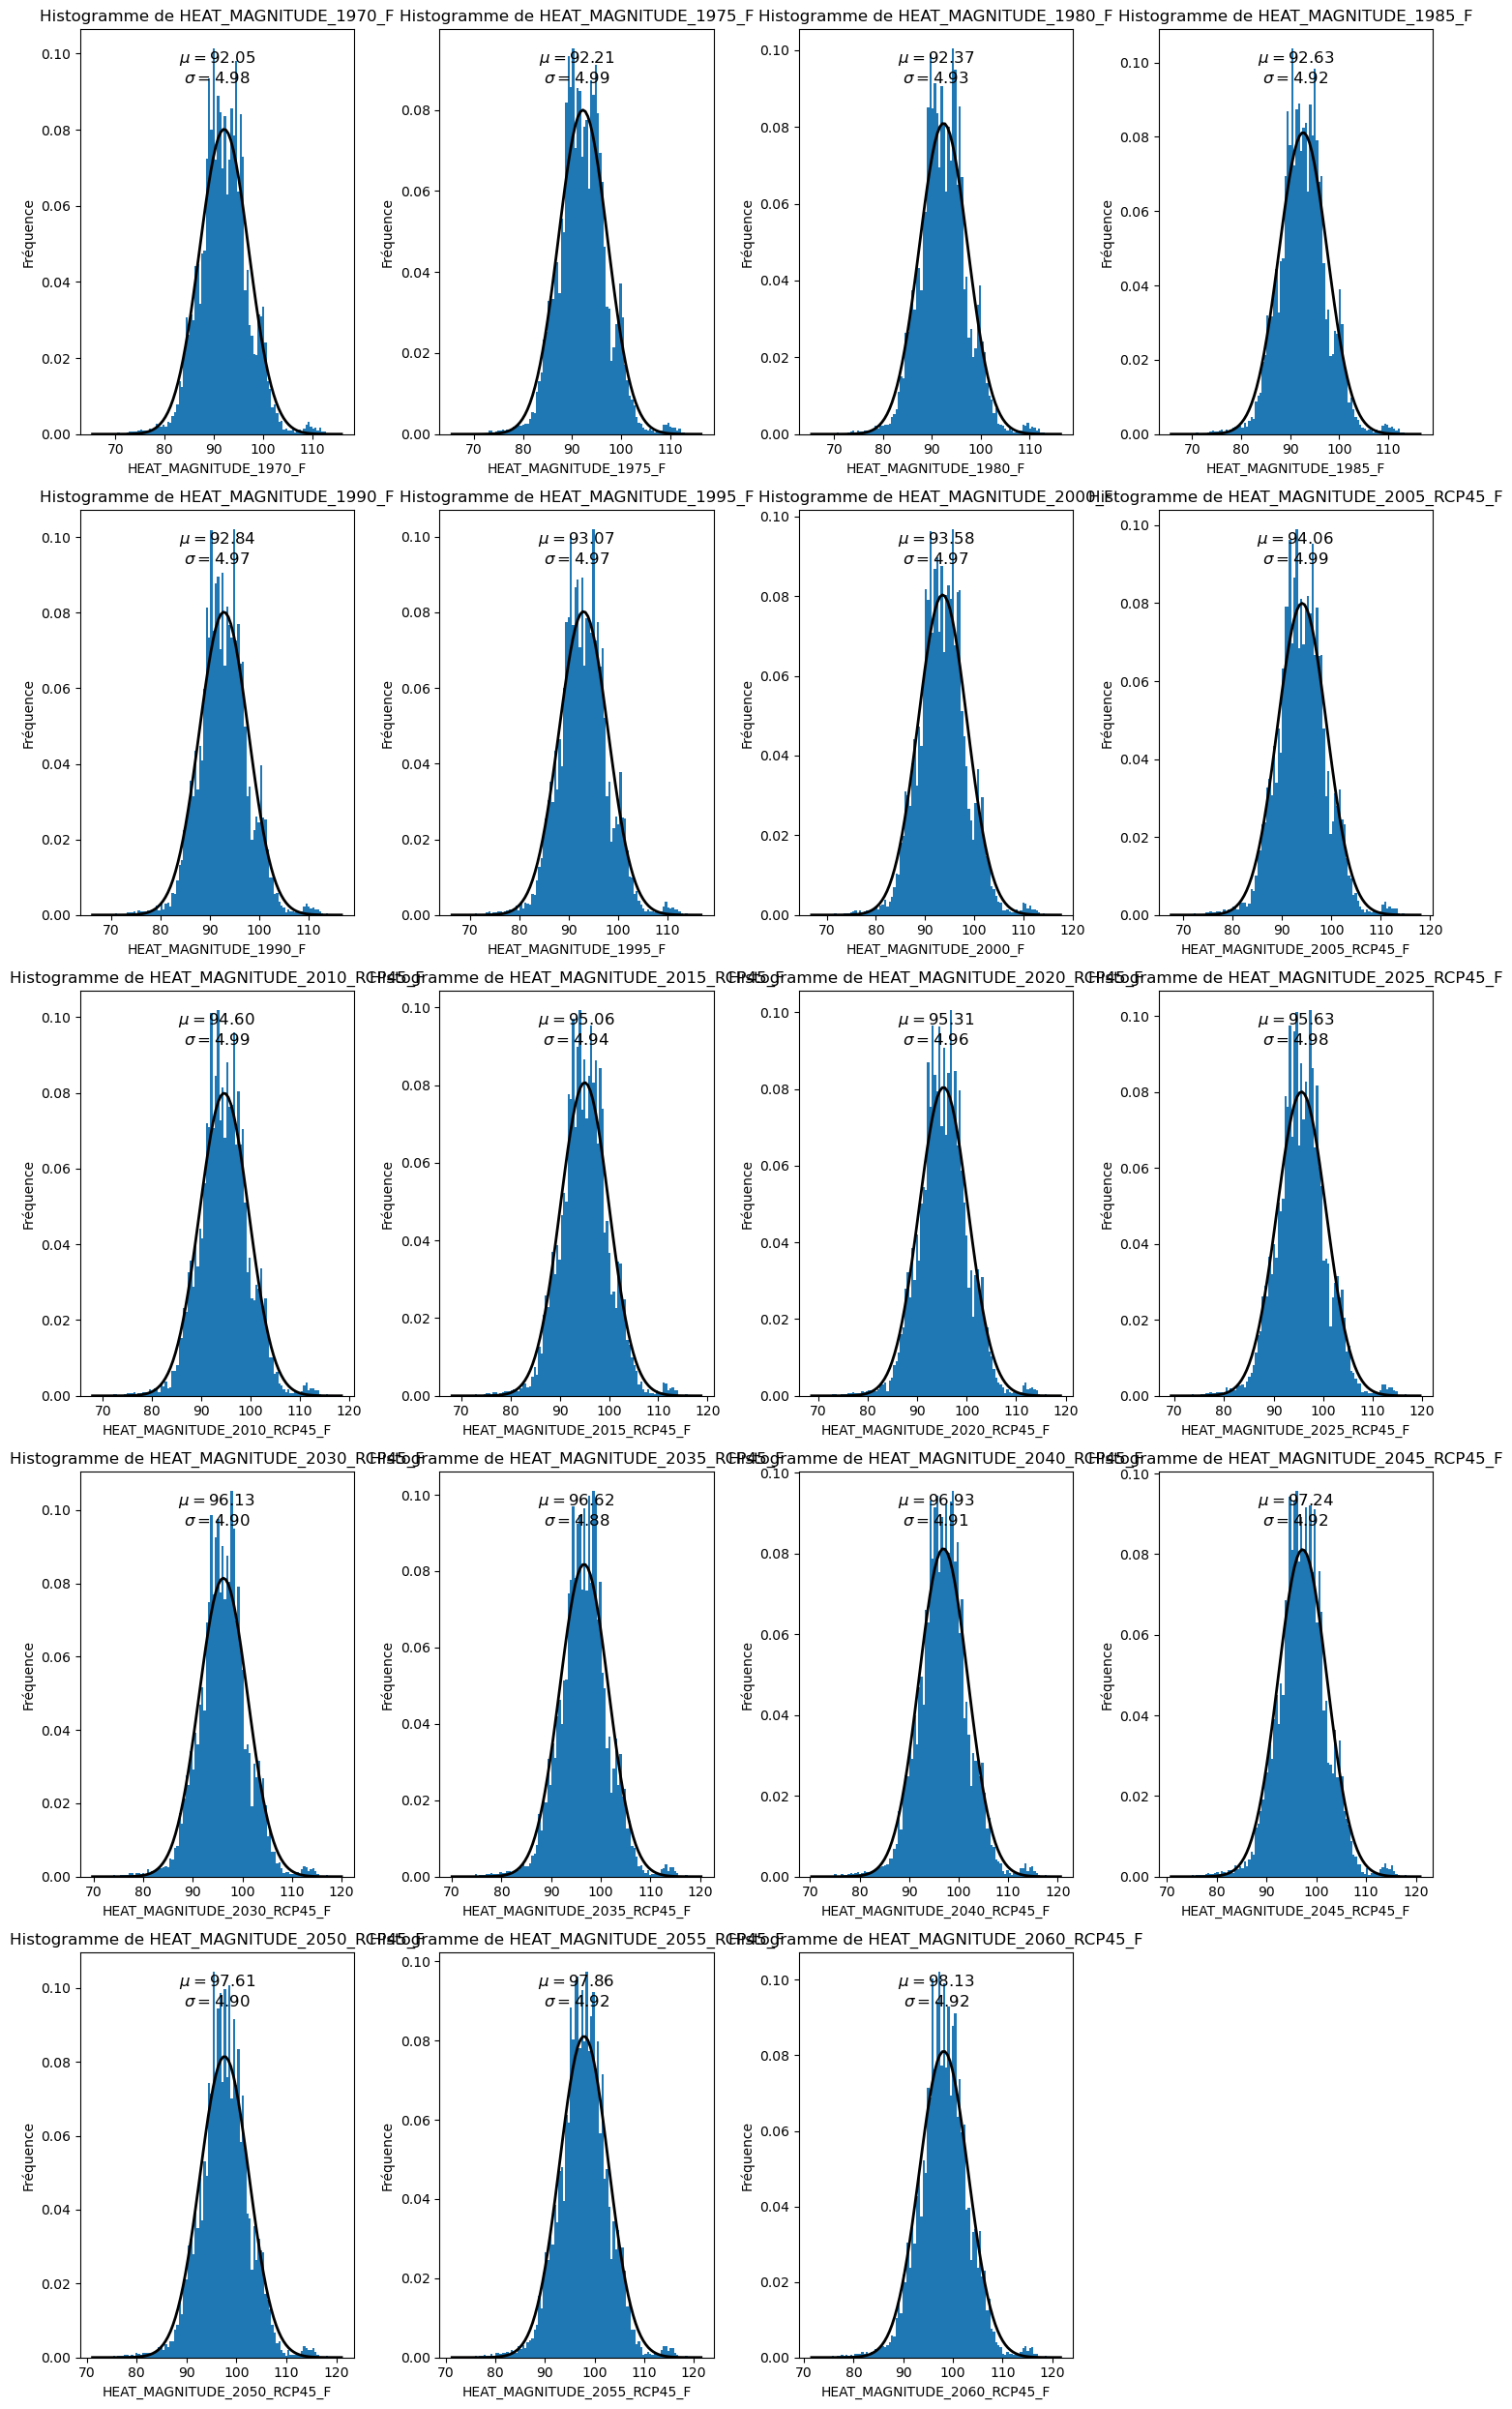

In [50]:
plot_startbyname_histograms_with_normal_fit(df, "HEAT_MAGNITUDE")

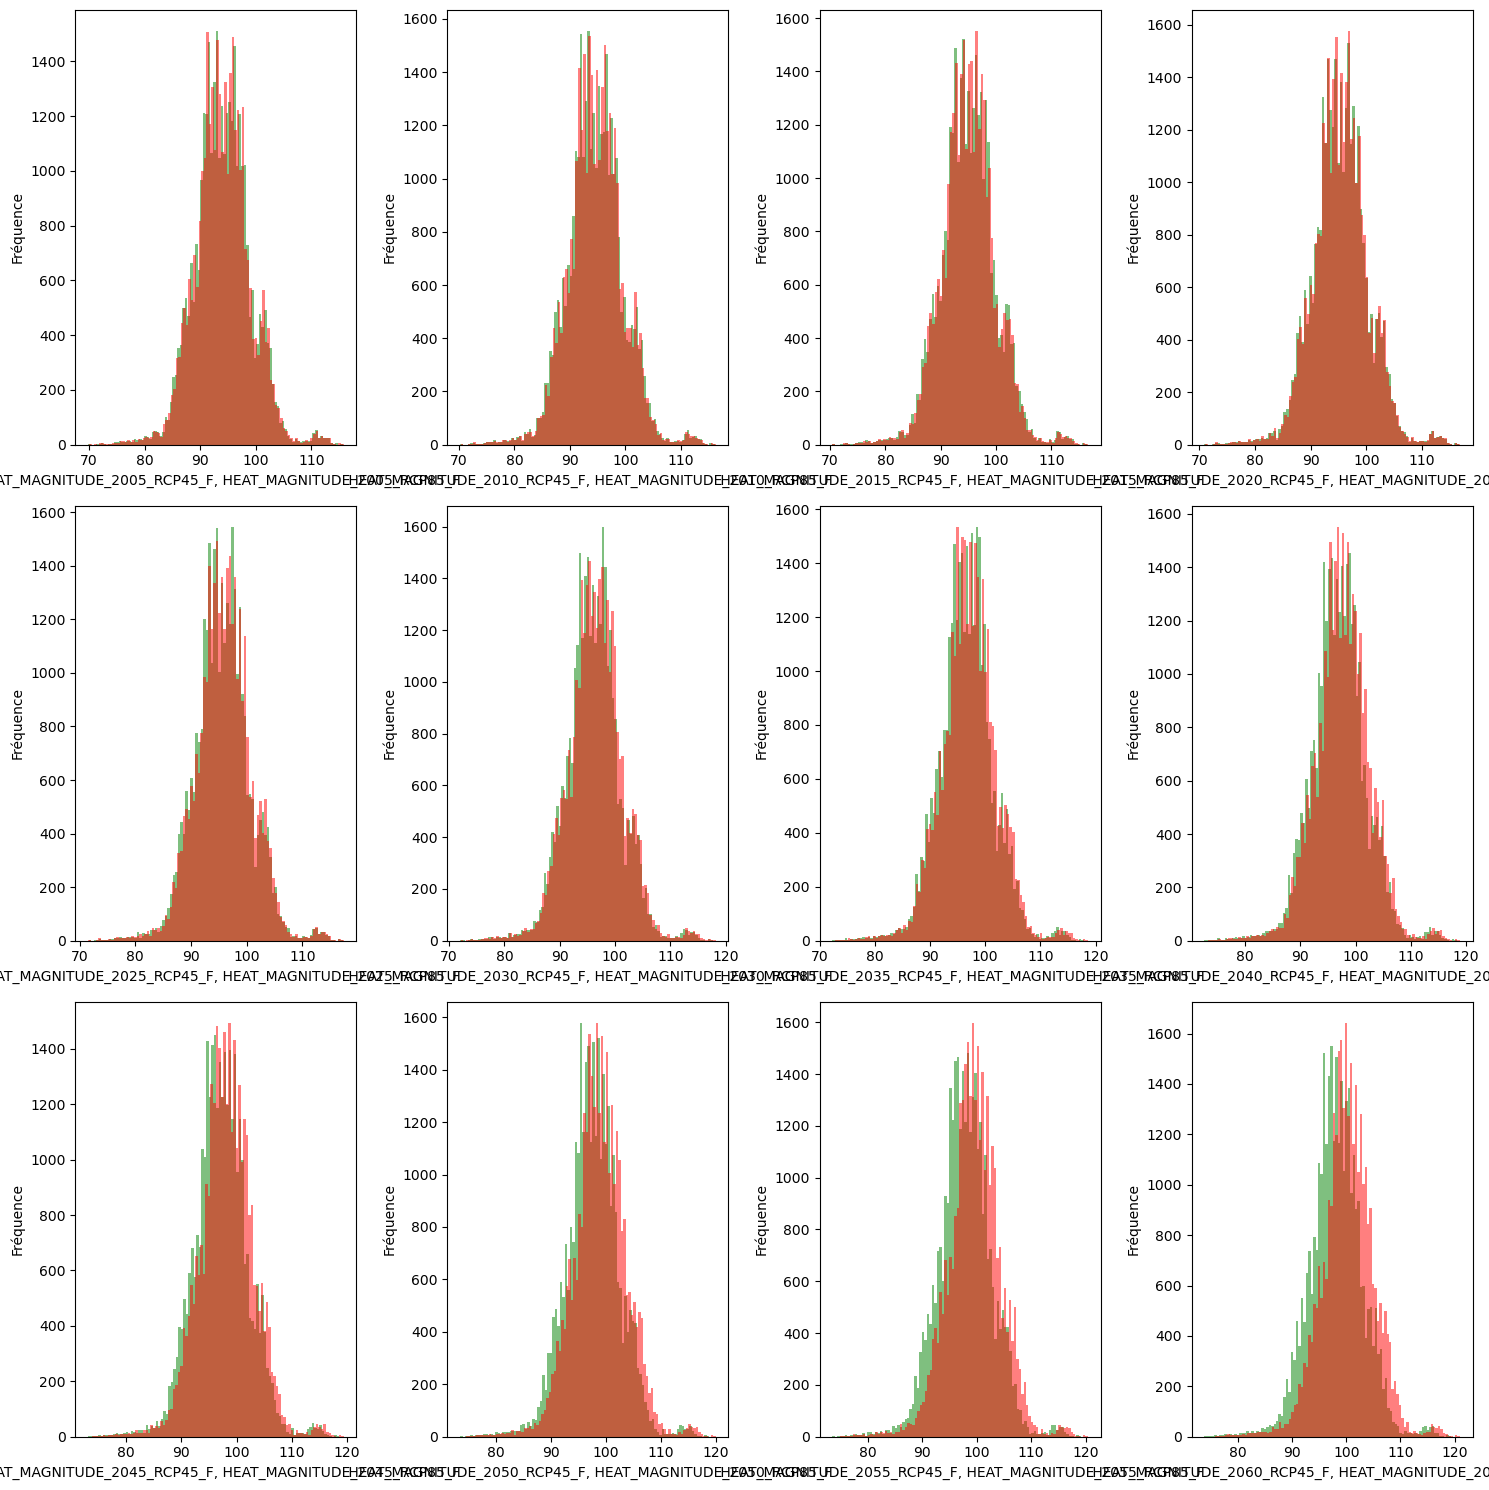

In [19]:
plot_startbyname_histograms_superposed(df, "HEAT_MAGNITUDE")

On constate notamment sur les années futures un décalage vers la droite du scénario RCP85 par rapport au scénario RCP45. C'est cohérent puisque dans le futur la fréquence sera plus élevé pour des températures plus élevés

['HEAT_MAGNITUDE_1970_F', 'HEAT_MAGNITUDE_1975_F', 'HEAT_MAGNITUDE_1980_F', 'HEAT_MAGNITUDE_1985_F', 'HEAT_MAGNITUDE_1990_F', 'HEAT_MAGNITUDE_1995_F', 'HEAT_MAGNITUDE_2000_F', 'HEAT_MAGNITUDE_2005_RCP45_F', 'HEAT_MAGNITUDE_2010_RCP45_F', 'HEAT_MAGNITUDE_2015_RCP45_F', 'HEAT_MAGNITUDE_2020_RCP45_F', 'HEAT_MAGNITUDE_2025_RCP45_F', 'HEAT_MAGNITUDE_2030_RCP45_F', 'HEAT_MAGNITUDE_2035_RCP45_F', 'HEAT_MAGNITUDE_2040_RCP45_F', 'HEAT_MAGNITUDE_2045_RCP45_F', 'HEAT_MAGNITUDE_2050_RCP45_F', 'HEAT_MAGNITUDE_2055_RCP45_F', 'HEAT_MAGNITUDE_2060_RCP45_F']


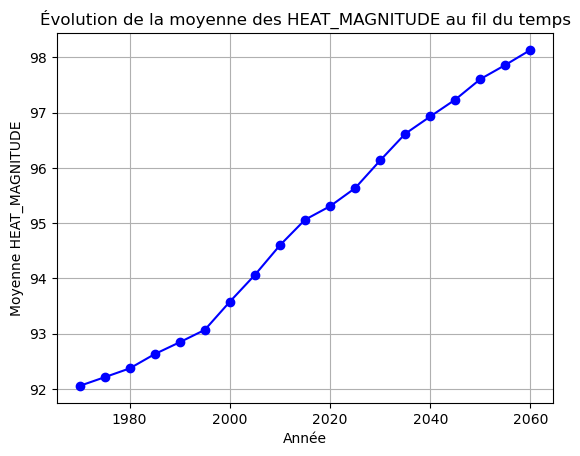

In [20]:
plot_mean_over_time(df,"HEAT_MAGNITUDE")

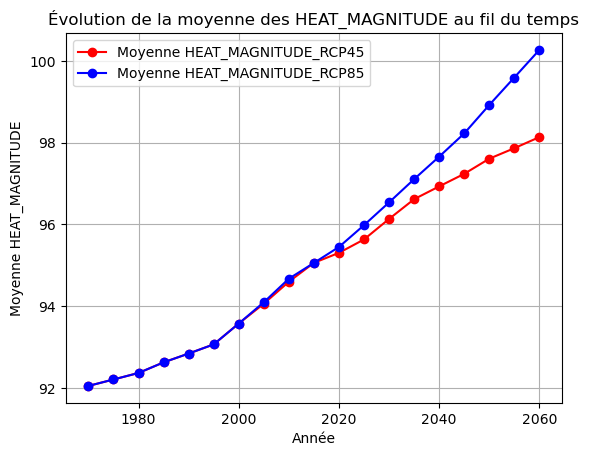

In [21]:
plot_mean_over_time_superposed(df,"HEAT_MAGNITUDE")

Cohérent : avec un scénario de forte émission de gaz à effet de serre, on obtient une note de chaleur en moyenne plus élevé que dans le scénario de faible émission de gaz à effet de serre. 

Amélioration : <span style="color: red">Tracer les moyennes en fonction des groupes de notes auxquels appartiennent les villes par ecxemple ceux notés de 0-20, ceux de 20-40 etc et observer la différence d'evolution ou pas</span> 

Création de la fonction répondant à l'amélioration 

In [22]:
def plot_mean_over_time_by_rating(df, start_name,rating):
    # Filtrer les colonnes qui commencent par start_name
    h_columns = df.filter(regex=f"^{start_name}").columns
    
    h_columns = [x for x in h_columns if not re.search(r'RCP85', x)] #en enlevent les RCP85
    #print(h_columns)

    # Diviser les States en fonction des valeurs de Heat_rating en 4 catégories
    rating_0_25 = df[df[rating] <= 25]
    rating_25_50 = df[(df[rating] > 25) & (df[rating] <= 50)]
    rating_50_75 = df[(df[rating] > 50) & (df[rating] <= 75)]
    rating_75_100 = df[df[rating] > 75]

    # Initialisation des listes pour les moyennes
    mean_values_0_25 = []
    mean_values_25_50 = []
    mean_values_50_75 = []
    mean_values_75_100 = []
    
    # Calculer la moyenne de chaque colonne pour les différentes plages de Heat_rating
    for col in h_columns:
        mean_values_0_25.append(rating_0_25[col].mean())
        mean_values_25_50.append(rating_25_50[col].mean())
        mean_values_50_75.append(rating_50_75[col].mean())
        mean_values_75_100.append(rating_75_100[col].mean())

    # Extraction des années de la colonne
    pattern = r'(\d{4})'  # Extraction de l'année
    years = np.unique(np.array([re.findall(pattern,element) for element in h_columns if re.search(pattern, element)])) # Toutes les années trouvées dans les noms de colonnes
    #print(years)
    
    # Convertir les années en entiers
    years = [int(year) for year in years]
    #print(years)


    # Tracer les courbes pour chaque plage de Heat_rating
    plt.plot(years, mean_values_0_25, marker='o', linestyle='-', color='blue', label="0-25 Heat Rating")
    plt.plot(years, mean_values_25_50, marker='o', linestyle='-', color='orange', label="25-50 Heat Rating")
    plt.plot(years, mean_values_50_75, marker='o', linestyle='-', color='green', label="50-75 Heat Rating")
    plt.plot(years, mean_values_75_100, marker='o', linestyle='-', color='red', label="75-100 Heat Rating")

    # Ajouter un titre, des labels et une légende
    plt.title(f"Évolution de la moyenne des {start_name} selon les Heat Ratings")
    plt.xlabel("Année")
    plt.ylabel(f"Moyenne {start_name}")
    plt.grid(True)
    plt.legend()  # Afficher la légende pour distinguer les différentes plages de Heat_rating
    plt.show()

#

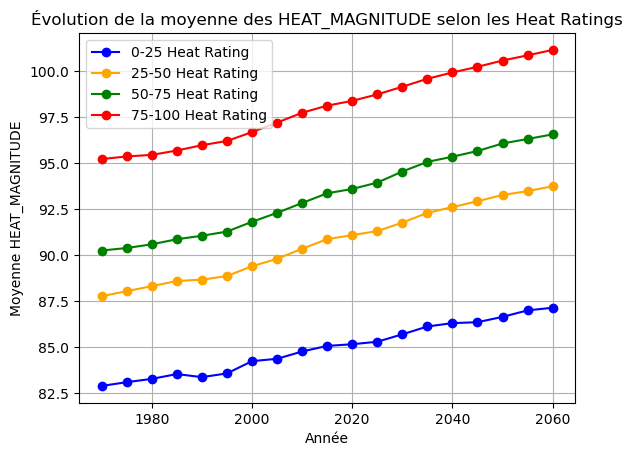

In [23]:
plot_mean_over_time_by_rating(df,"HEAT_MAGNITUDE","HEAT_RATING")

Une nouvelle fois c'est cohérent puisque au plus la note est élevée au plus le state a des risques d'avoir une heat magnitude élevée. Ce qui se confirme parfaitement avec cette fonction.

In [24]:
df.filter(regex=r"HEAT_MAGNITUDE").describe()

,HEAT_MAGNITUDE_1970_F,HEAT_MAGNITUDE_1975_F,HEAT_MAGNITUDE_1980_F,HEAT_MAGNITUDE_1985_F,HEAT_MAGNITUDE_1990_F,HEAT_MAGNITUDE_1995_F,HEAT_MAGNITUDE_2000_F,HEAT_MAGNITUDE_2005_RCP45_F,HEAT_MAGNITUDE_2010_RCP45_F,HEAT_MAGNITUDE_2015_RCP45_F,...,HEAT_MAGNITUDE_2015_RCP85_F,HEAT_MAGNITUDE_2020_RCP85_F,HEAT_MAGNITUDE_2025_RCP85_F,HEAT_MAGNITUDE_2030_RCP85_F,HEAT_MAGNITUDE_2035_RCP85_F,HEAT_MAGNITUDE_2040_RCP85_F,HEAT_MAGNITUDE_2045_RCP85_F,HEAT_MAGNITUDE_2050_RCP85_F,HEAT_MAGNITUDE_2055_RCP85_F,HEAT_MAGNITUDE_2060_RCP85_F
count,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,...,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000
mean,92.053757,92.211357,92.370739,92.629880,92.844799,93.068760,93.578700,94.063393,94.600616,95.061703,...,95.060000,95.449429,95.982523,96.539057,97.106694,97.657063,98.224483,98.920138,99.591189,100.265673
std,4.977610,4.989444,4.927169,4.915433,4.973756,4.971671,4.966174,4.986940,4.991074,4.944619,...,4.873276,4.918638,4.947965,4.950253,4.962623,4.931178,4.919688,4.924683,4.853318,4.828290
min,67.600000,67.800000,67.700000,68.000000,68.500000,68.700000,69.200000,69.800000,70.200000,70.400000,...,70.400000,71.000000,71.500000,72.100000,72.800000,73.300000,73.900000,74.500000,75.000000,75.800000
25%,89.000000,89.100000,89.300000,89.600000,89.800000,90.000000,90.500000,91.000000,91.500000,92.100000,...,92.100000,92.500000,93.000000,93.600000,94.200000,94.800000,95.400000,96.100000,96.800000,97.500000
50%,91.900000,92.000000,92.200000,92.500000,92.700000,92.900000,93.500000,93.900000,94.500000,95.000000,...,95.000000,95.400000,95.900000,96.500000,97.100000,97.700000,98.200000,98.900000,99.600000,100.200000
75%,95.100000,95.200000,95.300000,95.600000,95.800000,96.100000,96.600000,97.100000,97.700000,98.000000,...,98.000000,98.400000,99.000000,99.500000,100.100000,100.700000,101.300000,101.900000,102.500000,103.200000
max,113.600000,114.000000,114.000000,114.200000,114.400000,114.600000,115.300000,115.700000,116.100000,116.400000,...,116.600000,116.800000,117.400000,118.200000,118.600000,118.900000,119.400000,120.000000,120.400000,121.000000


##### 1.2 HEAT_EVENTS : Number of extremely hot days (above historical threshold) per year: average around target year

In [25]:
df.filter(regex=r"HEAT_EVENTS").describe()

,HEAT_EVENTS_1970,HEAT_EVENTS_1975,HEAT_EVENTS_1980,HEAT_EVENTS_1985,HEAT_EVENTS_1990,HEAT_EVENTS_1995,HEAT_EVENTS_2000,HEAT_EVENTS_2005_RCP45,HEAT_EVENTS_2010_RCP45,HEAT_EVENTS_2015_RCP45,...,HEAT_EVENTS_2015_RCP85,HEAT_EVENTS_2020_RCP85,HEAT_EVENTS_2025_RCP85,HEAT_EVENTS_2030_RCP85,HEAT_EVENTS_2035_RCP85,HEAT_EVENTS_2040_RCP85,HEAT_EVENTS_2045_RCP85,HEAT_EVENTS_2050_RCP85,HEAT_EVENTS_2055_RCP85,HEAT_EVENTS_2060_RCP85
count,33300.000000,33300.000000,33300.000000,33300.000000,33300.0,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,...,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000
mean,5.628498,6.025616,6.321141,6.942462,7.0,8.229760,10.008589,12.036066,14.473814,16.531952,...,16.039730,18.037838,20.763724,23.969670,27.432492,30.875736,34.792132,39.269009,43.976517,49.045736
std,0.616138,0.555709,0.655587,0.412563,0.0,0.454782,0.755523,1.429040,2.110055,2.591171,...,2.475566,3.241236,4.075929,5.217701,6.432600,7.703860,9.073437,9.988173,11.270289,12.622824
min,4.000000,4.000000,4.000000,6.000000,7.0,7.000000,8.000000,9.000000,9.000000,9.000000,...,9.000000,10.000000,11.000000,11.000000,11.000000,12.000000,12.000000,13.000000,14.000000,15.000000
25%,5.000000,6.000000,6.000000,7.000000,7.0,8.000000,10.000000,11.000000,13.000000,15.000000,...,14.000000,16.000000,18.000000,21.000000,24.000000,26.000000,29.000000,34.000000,38.000000,42.000000
50%,6.000000,6.000000,6.000000,7.000000,7.0,8.000000,10.000000,12.000000,14.000000,17.000000,...,16.000000,18.000000,21.000000,24.000000,27.000000,30.000000,34.000000,39.000000,43.000000,48.000000
75%,6.000000,6.000000,7.000000,7.000000,7.0,8.000000,10.000000,13.000000,16.000000,18.000000,...,17.000000,19.000000,23.000000,26.000000,30.000000,34.000000,39.000000,43.000000,49.000000,54.000000
max,8.000000,8.000000,8.000000,8.000000,7.0,10.000000,15.000000,19.000000,26.000000,34.000000,...,33.000000,41.000000,49.000000,60.000000,72.000000,86.000000,97.000000,107.000000,118.000000,128.000000


['HEAT_EVENTS_1970', 'HEAT_EVENTS_1975', 'HEAT_EVENTS_1980', 'HEAT_EVENTS_1985', 'HEAT_EVENTS_1990', 'HEAT_EVENTS_1995', 'HEAT_EVENTS_2000', 'HEAT_EVENTS_2005_RCP45', 'HEAT_EVENTS_2010_RCP45', 'HEAT_EVENTS_2015_RCP45', 'HEAT_EVENTS_2020_RCP45', 'HEAT_EVENTS_2025_RCP45', 'HEAT_EVENTS_2030_RCP45', 'HEAT_EVENTS_2035_RCP45', 'HEAT_EVENTS_2040_RCP45', 'HEAT_EVENTS_2045_RCP45', 'HEAT_EVENTS_2050_RCP45', 'HEAT_EVENTS_2055_RCP45', 'HEAT_EVENTS_2060_RCP45']


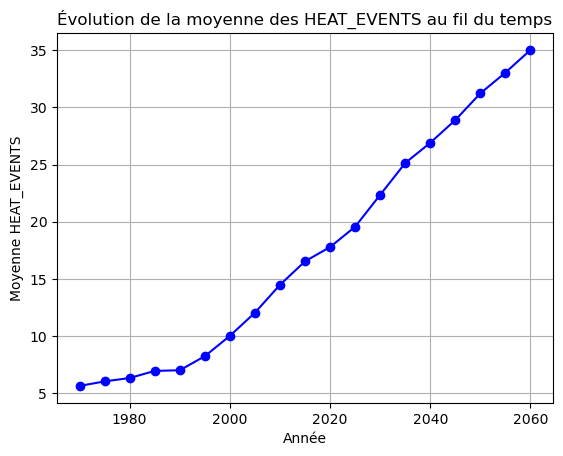

In [26]:
plot_mean_over_time(df,"HEAT_EVENTS")


Amélioration : <span style="color: red">Tracer les moyennes en fonction des groupes de notes auxquels appartiennent les villes par ecxemple ceux notés de 0-20, ceux de 20-40 etc et observer la différence d'evolution ou pas</span> 

Réponse à cette amélioration ci dessous :

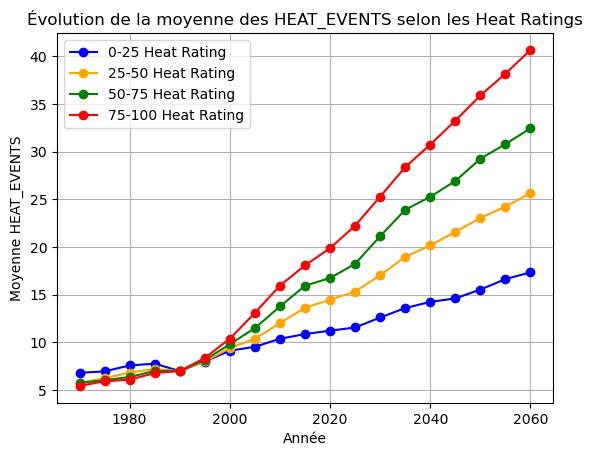

In [27]:
plot_mean_over_time_by_rating(df,"HEAT_EVENTS","HEAT_RATING")

Une nouvelle fois relativement cohérent

Index(['HEAT_EVENTS_1970', 'HEAT_EVENTS_1975', 'HEAT_EVENTS_1980',
       'HEAT_EVENTS_1985', 'HEAT_EVENTS_1990', 'HEAT_EVENTS_1995',
       'HEAT_EVENTS_2000', 'HEAT_EVENTS_2005_RCP45', 'HEAT_EVENTS_2010_RCP45',
       'HEAT_EVENTS_2015_RCP45', 'HEAT_EVENTS_2020_RCP45',
       'HEAT_EVENTS_2025_RCP45', 'HEAT_EVENTS_2030_RCP45',
       'HEAT_EVENTS_2035_RCP45', 'HEAT_EVENTS_2040_RCP45',
       'HEAT_EVENTS_2045_RCP45', 'HEAT_EVENTS_2050_RCP45',
       'HEAT_EVENTS_2055_RCP45', 'HEAT_EVENTS_2060_RCP45',
       'HEAT_EVENTS_2005_RCP85', 'HEAT_EVENTS_2010_RCP85',
       'HEAT_EVENTS_2015_RCP85', 'HEAT_EVENTS_2020_RCP85',
       'HEAT_EVENTS_2025_RCP85', 'HEAT_EVENTS_2030_RCP85',
       'HEAT_EVENTS_2035_RCP85', 'HEAT_EVENTS_2040_RCP85',
       'HEAT_EVENTS_2045_RCP85', 'HEAT_EVENTS_2050_RCP85',
       'HEAT_EVENTS_2055_RCP85', 'HEAT_EVENTS_2060_RCP85'],
      dtype='object')


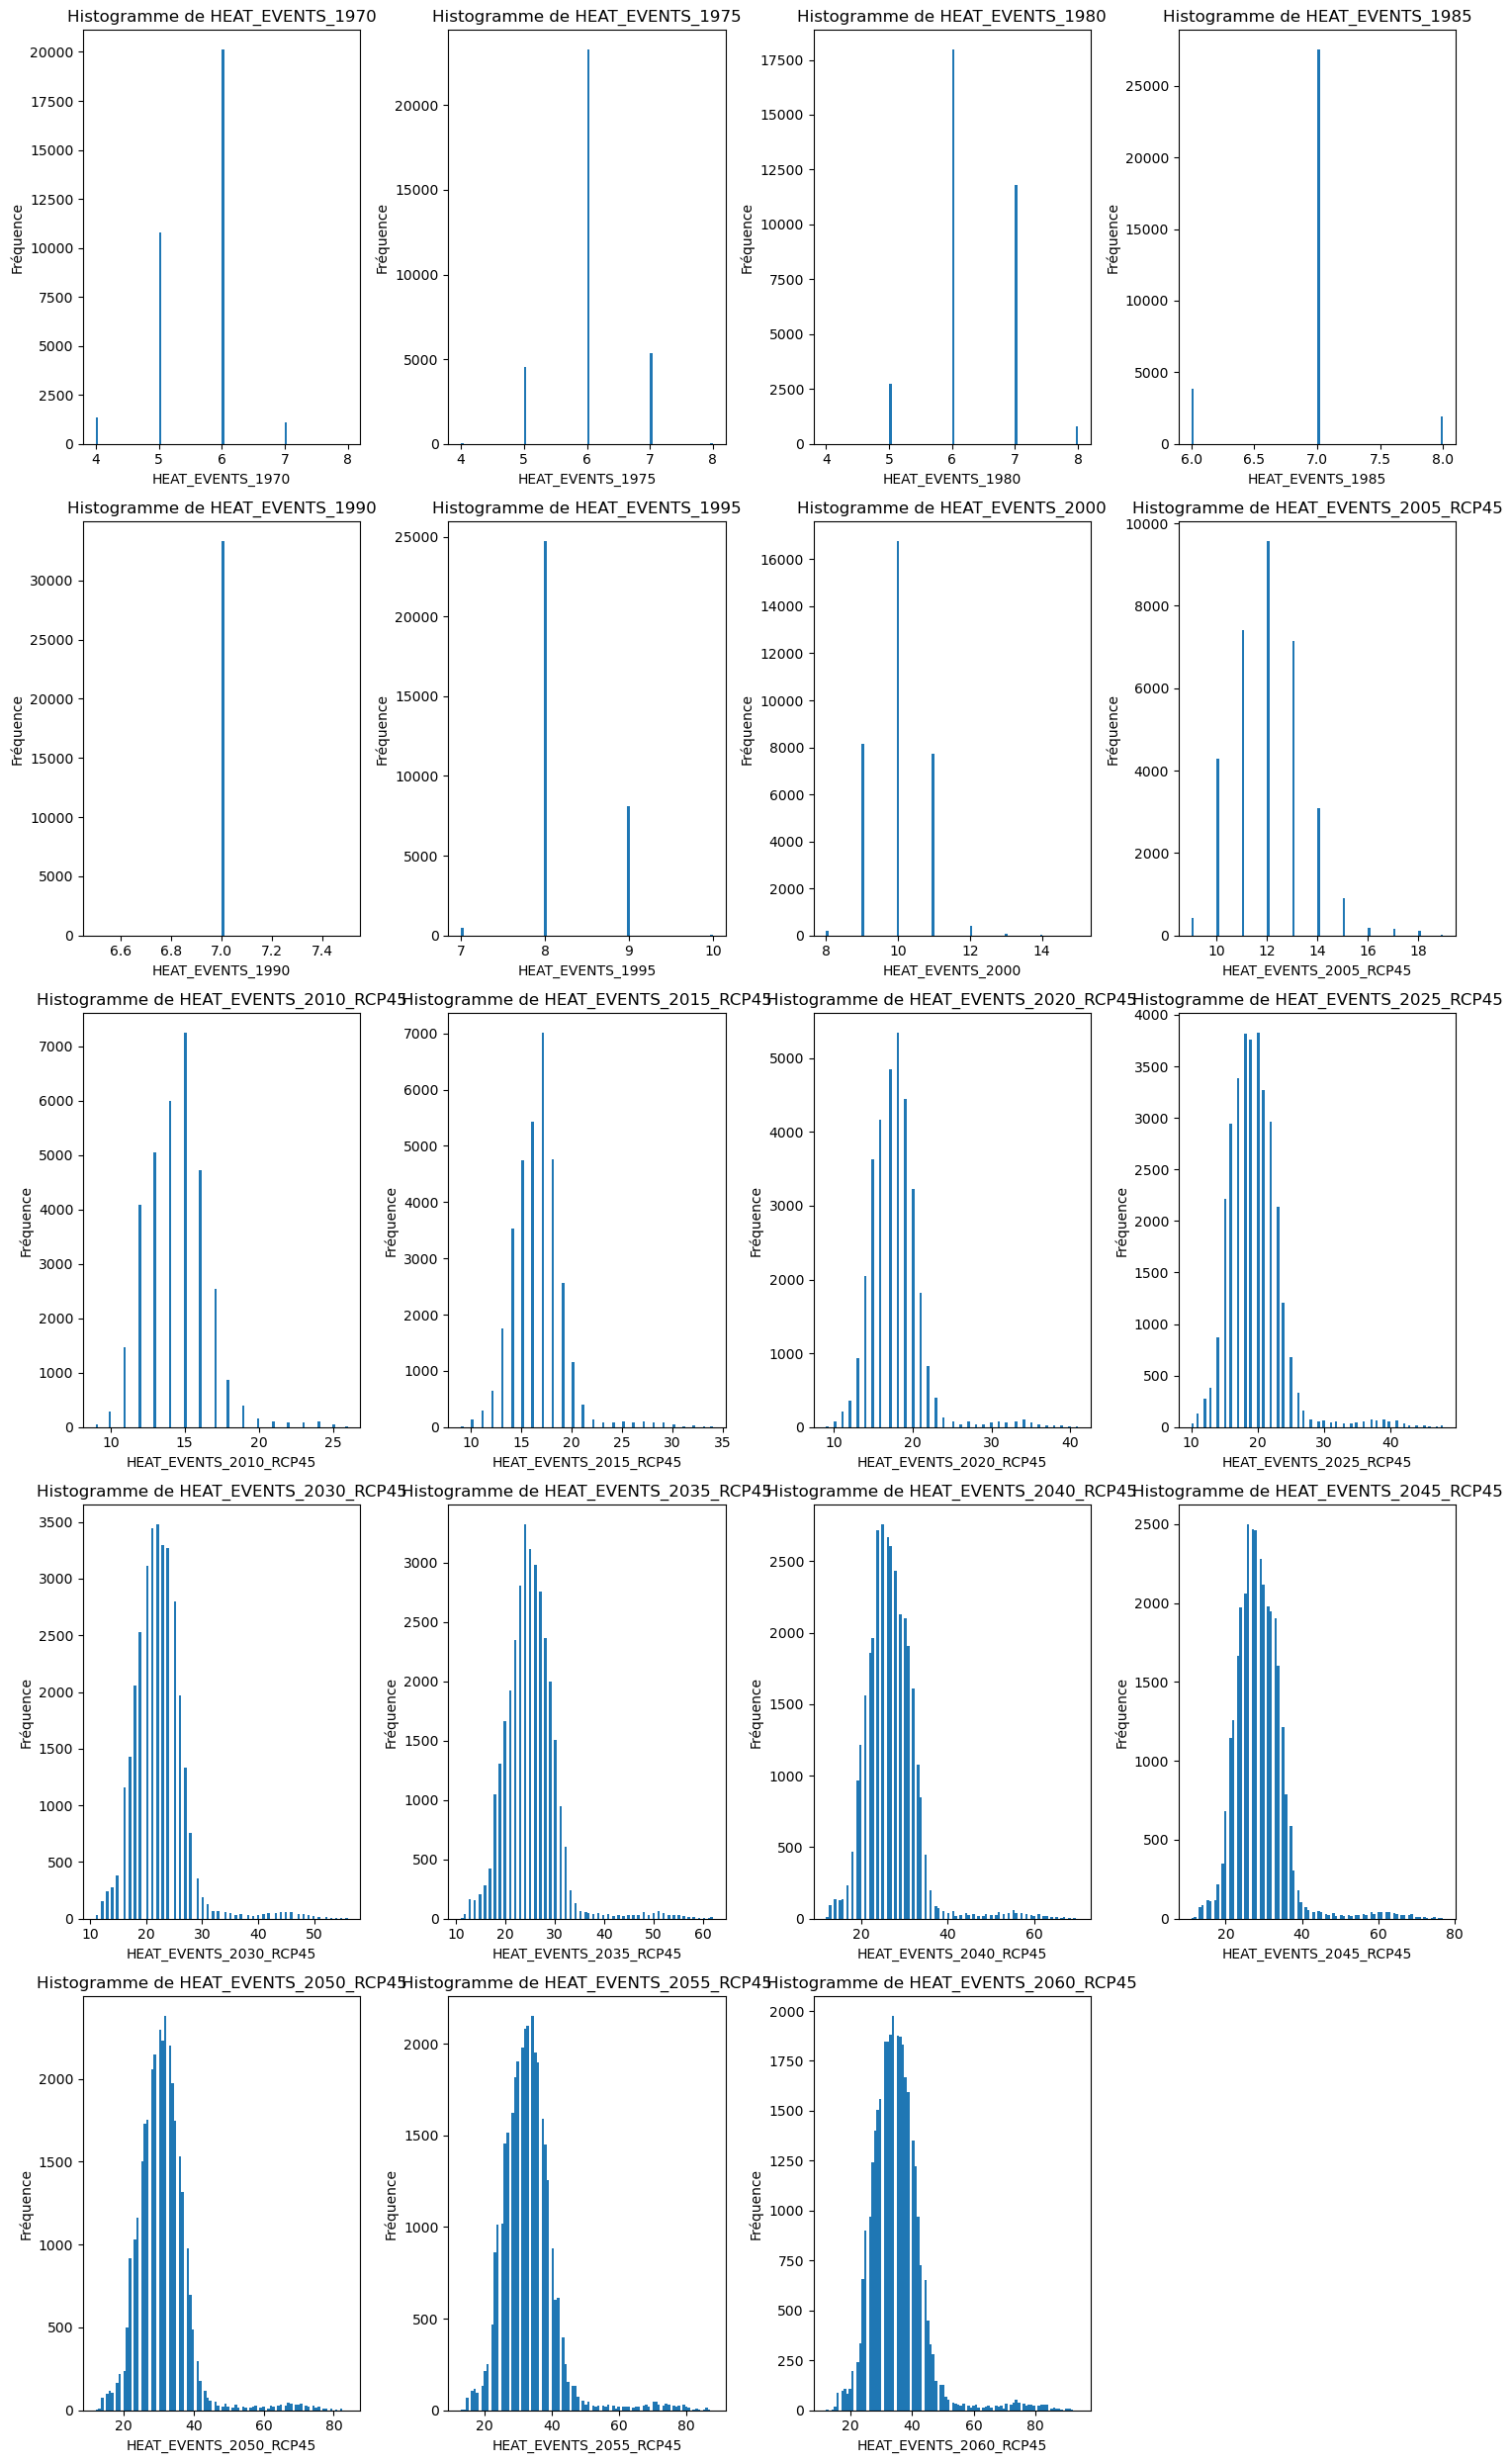

In [28]:
plot_startbyname_histograms(df, "HEAT_EVENTS")

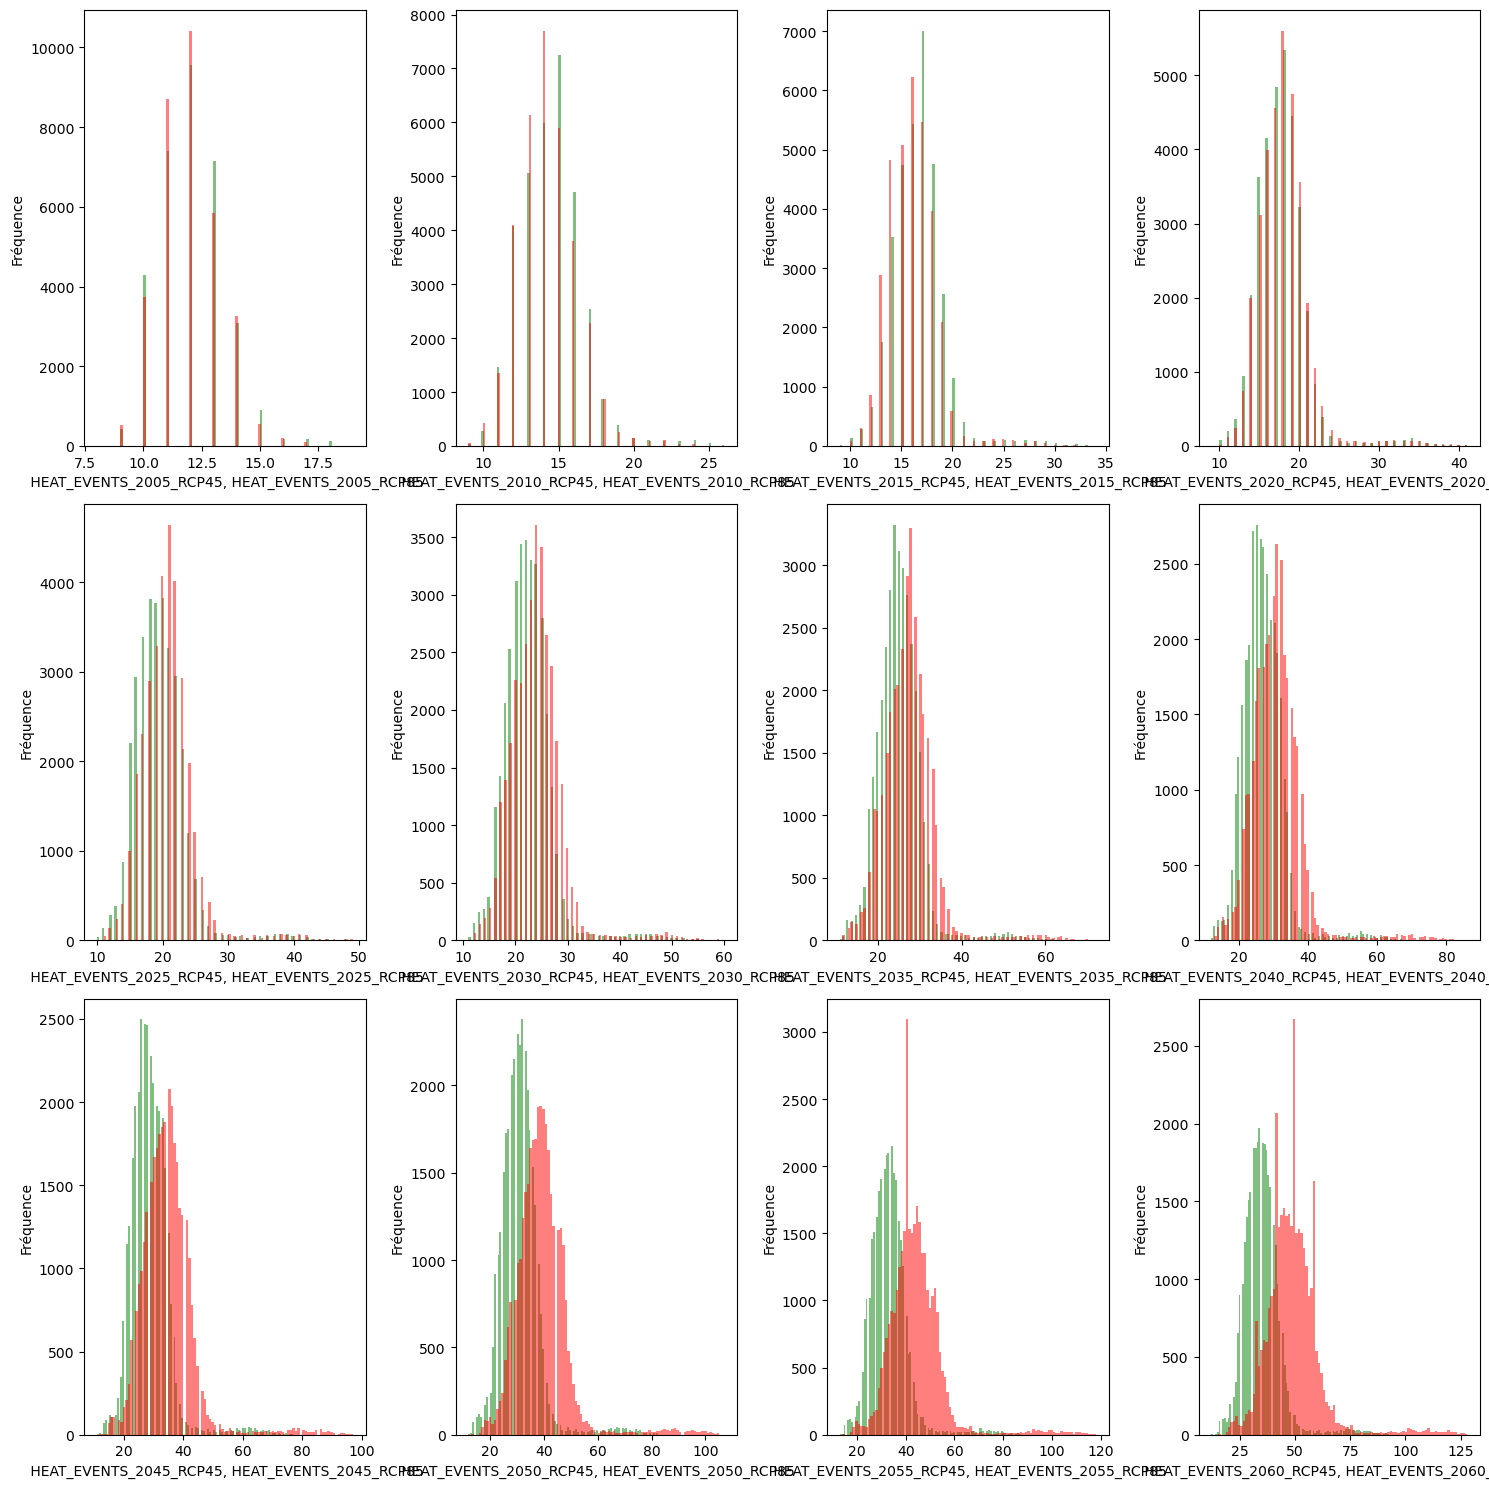

In [29]:
plot_startbyname_histograms_superposed(df, "HEAT_EVENTS")

Cohérent... décalage vers la droite

### 2. Precipitation

Chaque ville a une note de risque de precipitation "PRECIP_RATING" et un palier pour ce qui est considéré comme pluie torentielle "PRECIP_THRESHOLD_IN"

In [30]:
df.loc[:,["PRECIP_RATING", "PRECIP_THRESHOLD_IN"]].describe()

,PRECIP_RATING,PRECIP_THRESHOLD_IN
count,33300.000000,33300.000000
mean,67.230180,0.822267
std,25.024387,0.251390
min,1.000000,0.100000
25%,53.000000,0.700000
50%,73.000000,0.800000
75%,88.000000,1.000000
max,100.000000,3.400000


In [31]:
df.filter(regex=r'PRECIP').columns

Index(['PRECIP_RATING', 'PRECIP_THRESHOLD_IN', 'PRECIP_EVENTS_1970',
       'PRECIP_EVENTS_1975', 'PRECIP_EVENTS_1980', 'PRECIP_EVENTS_1985',
       'PRECIP_EVENTS_1990', 'PRECIP_EVENTS_1995', 'PRECIP_EVENTS_2000',
       'PRECIP_EVENTS_2005_RCP45', 'PRECIP_EVENTS_2010_RCP45',
       'PRECIP_EVENTS_2015_RCP45', 'PRECIP_EVENTS_2020_RCP45',
       'PRECIP_EVENTS_2025_RCP45', 'PRECIP_EVENTS_2030_RCP45',
       'PRECIP_EVENTS_2035_RCP45', 'PRECIP_EVENTS_2040_RCP45',
       'PRECIP_EVENTS_2045_RCP45', 'PRECIP_EVENTS_2050_RCP45',
       'PRECIP_EVENTS_2055_RCP45', 'PRECIP_EVENTS_2060_RCP45',
       'PRECIP_EVENTS_2005_RCP85', 'PRECIP_EVENTS_2010_RCP85',
       'PRECIP_EVENTS_2015_RCP85', 'PRECIP_EVENTS_2020_RCP85',
       'PRECIP_EVENTS_2025_RCP85', 'PRECIP_EVENTS_2030_RCP85',
       'PRECIP_EVENTS_2035_RCP85', 'PRECIP_EVENTS_2040_RCP85',
       'PRECIP_EVENTS_2045_RCP85', 'PRECIP_EVENTS_2050_RCP85',
       'PRECIP_EVENTS_2055_RCP85', 'PRECIP_EVENTS_2060_RCP85',
       'PRECIP_TOTALS_1970_IN

#### 2.1 PRECIP_EVENTS : Number of downpours per year: average around target year

In [32]:
df.filter(regex=r"PRECIP_EVENTS").describe()

,PRECIP_EVENTS_1970,PRECIP_EVENTS_1975,PRECIP_EVENTS_1980,PRECIP_EVENTS_1985,PRECIP_EVENTS_1990,PRECIP_EVENTS_1995,PRECIP_EVENTS_2000,PRECIP_EVENTS_2005_RCP45,PRECIP_EVENTS_2010_RCP45,PRECIP_EVENTS_2015_RCP45,...,PRECIP_EVENTS_2015_RCP85,PRECIP_EVENTS_2020_RCP85,PRECIP_EVENTS_2025_RCP85,PRECIP_EVENTS_2030_RCP85,PRECIP_EVENTS_2035_RCP85,PRECIP_EVENTS_2040_RCP85,PRECIP_EVENTS_2045_RCP85,PRECIP_EVENTS_2050_RCP85,PRECIP_EVENTS_2055_RCP85,PRECIP_EVENTS_2060_RCP85
count,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,...,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000
mean,11.241201,11.255856,11.233453,11.285616,11.175375,11.338919,11.661952,11.739249,11.951441,12.101051,...,11.974324,12.165916,12.364474,12.404354,12.421351,12.610601,12.805526,12.911532,13.074775,13.156577
std,0.884763,0.864253,0.883990,0.914832,0.917279,0.900647,1.000219,1.044678,1.111741,1.228325,...,1.139732,1.214178,1.278759,1.300636,1.320578,1.413530,1.500559,1.628814,1.747043,1.768075
min,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000
25%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
50%,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,13.000000,13.000000,13.000000,13.000000,13.000000
75%,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,13.000000,13.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,17.000000,...,17.000000,17.000000,16.000000,16.000000,17.000000,17.000000,17.000000,18.000000,18.000000,18.000000


['PRECIP_EVENTS_1970', 'PRECIP_EVENTS_1975', 'PRECIP_EVENTS_1980', 'PRECIP_EVENTS_1985', 'PRECIP_EVENTS_1990', 'PRECIP_EVENTS_1995', 'PRECIP_EVENTS_2000', 'PRECIP_EVENTS_2005_RCP45', 'PRECIP_EVENTS_2010_RCP45', 'PRECIP_EVENTS_2015_RCP45', 'PRECIP_EVENTS_2020_RCP45', 'PRECIP_EVENTS_2025_RCP45', 'PRECIP_EVENTS_2030_RCP45', 'PRECIP_EVENTS_2035_RCP45', 'PRECIP_EVENTS_2040_RCP45', 'PRECIP_EVENTS_2045_RCP45', 'PRECIP_EVENTS_2050_RCP45', 'PRECIP_EVENTS_2055_RCP45', 'PRECIP_EVENTS_2060_RCP45']


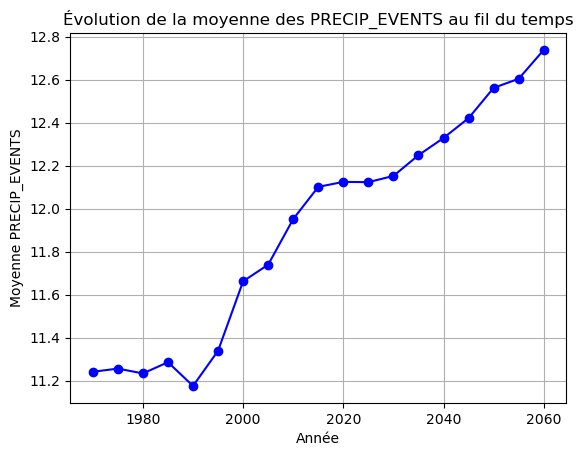

In [33]:
plot_mean_over_time(df,"PRECIP_EVENTS")

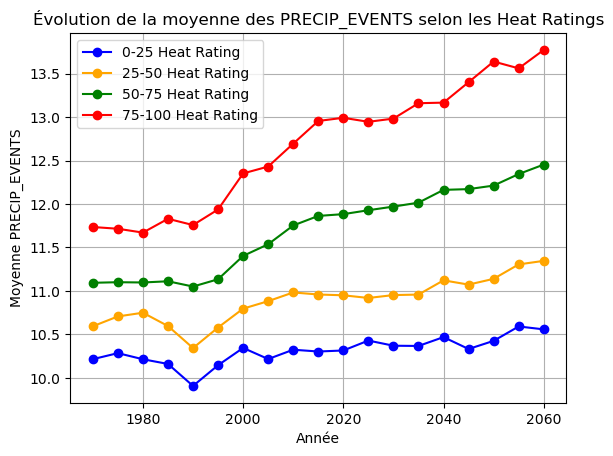

In [34]:
plot_mean_over_time_by_rating(df, "PRECIP_EVENTS","PRECIP_RATING")

Index(['HEAT_EVENTS_1970', 'HEAT_EVENTS_1975', 'HEAT_EVENTS_1980',
       'HEAT_EVENTS_1985', 'HEAT_EVENTS_1990', 'HEAT_EVENTS_1995',
       'HEAT_EVENTS_2000', 'HEAT_EVENTS_2005_RCP45', 'HEAT_EVENTS_2010_RCP45',
       'HEAT_EVENTS_2015_RCP45', 'HEAT_EVENTS_2020_RCP45',
       'HEAT_EVENTS_2025_RCP45', 'HEAT_EVENTS_2030_RCP45',
       'HEAT_EVENTS_2035_RCP45', 'HEAT_EVENTS_2040_RCP45',
       'HEAT_EVENTS_2045_RCP45', 'HEAT_EVENTS_2050_RCP45',
       'HEAT_EVENTS_2055_RCP45', 'HEAT_EVENTS_2060_RCP45',
       'HEAT_EVENTS_2005_RCP85', 'HEAT_EVENTS_2010_RCP85',
       'HEAT_EVENTS_2015_RCP85', 'HEAT_EVENTS_2020_RCP85',
       'HEAT_EVENTS_2025_RCP85', 'HEAT_EVENTS_2030_RCP85',
       'HEAT_EVENTS_2035_RCP85', 'HEAT_EVENTS_2040_RCP85',
       'HEAT_EVENTS_2045_RCP85', 'HEAT_EVENTS_2050_RCP85',
       'HEAT_EVENTS_2055_RCP85', 'HEAT_EVENTS_2060_RCP85'],
      dtype='object')


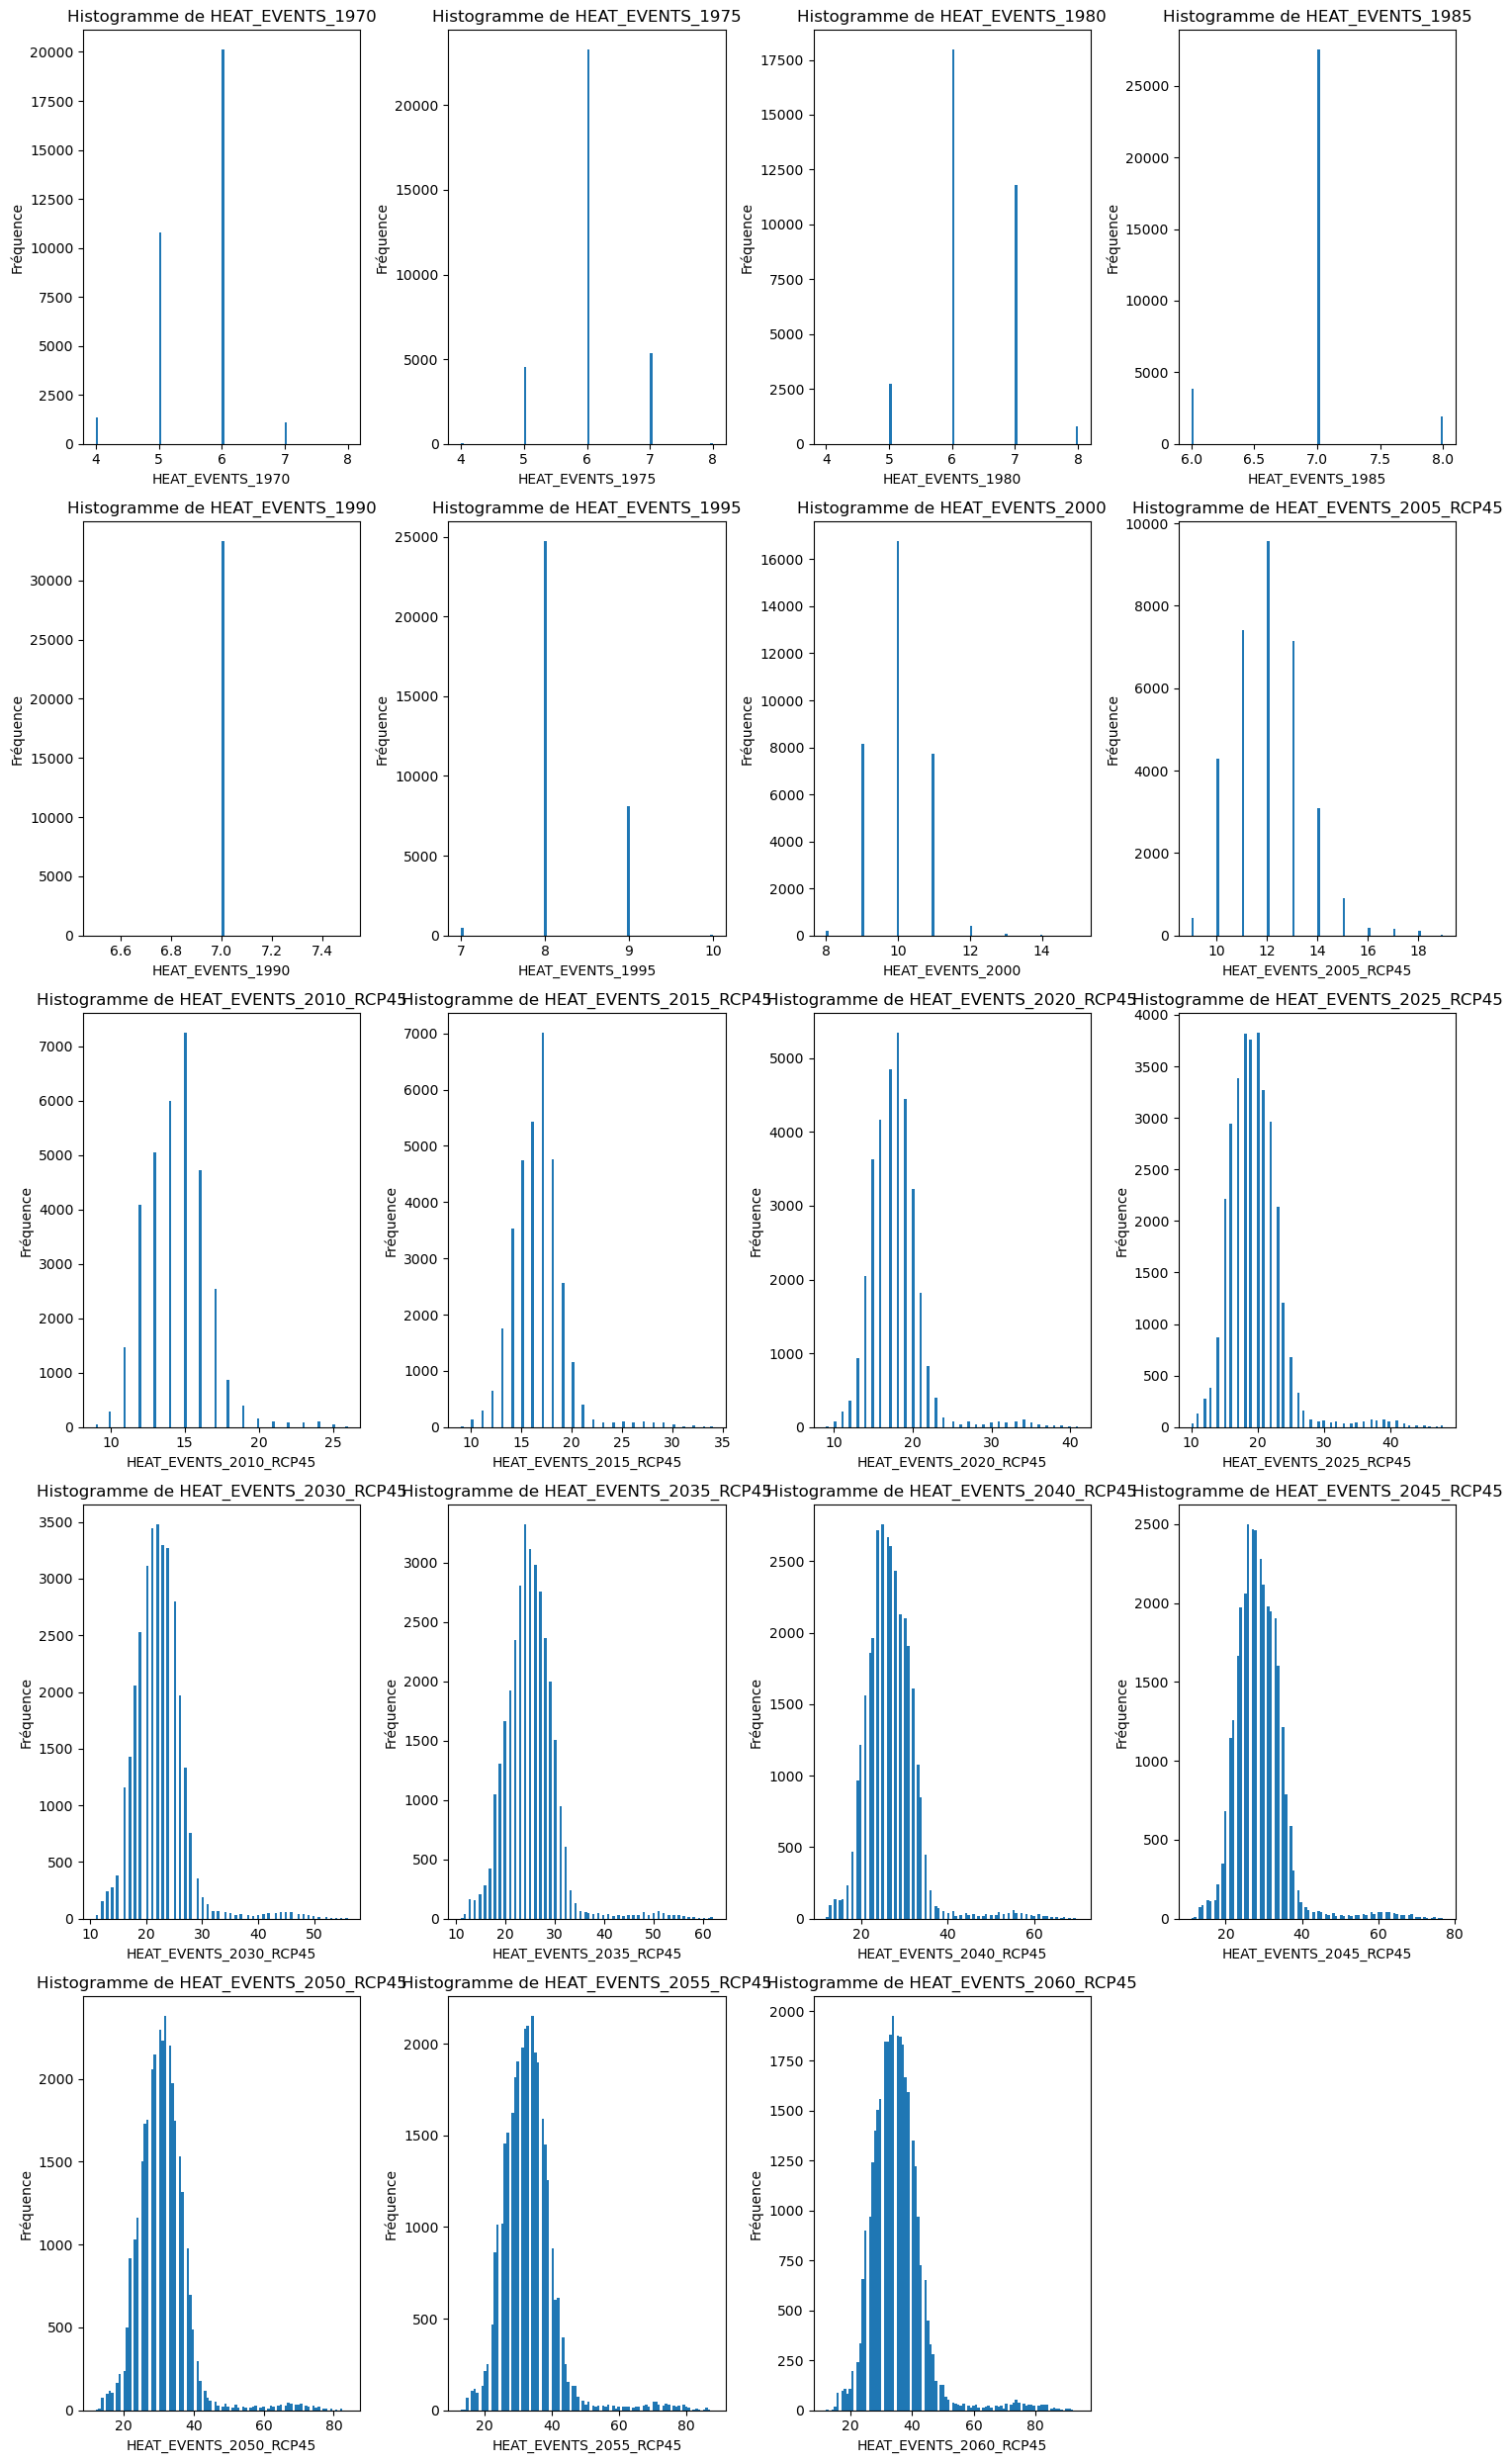

In [35]:
plot_startbyname_histograms(df, "HEAT_EVENTS")

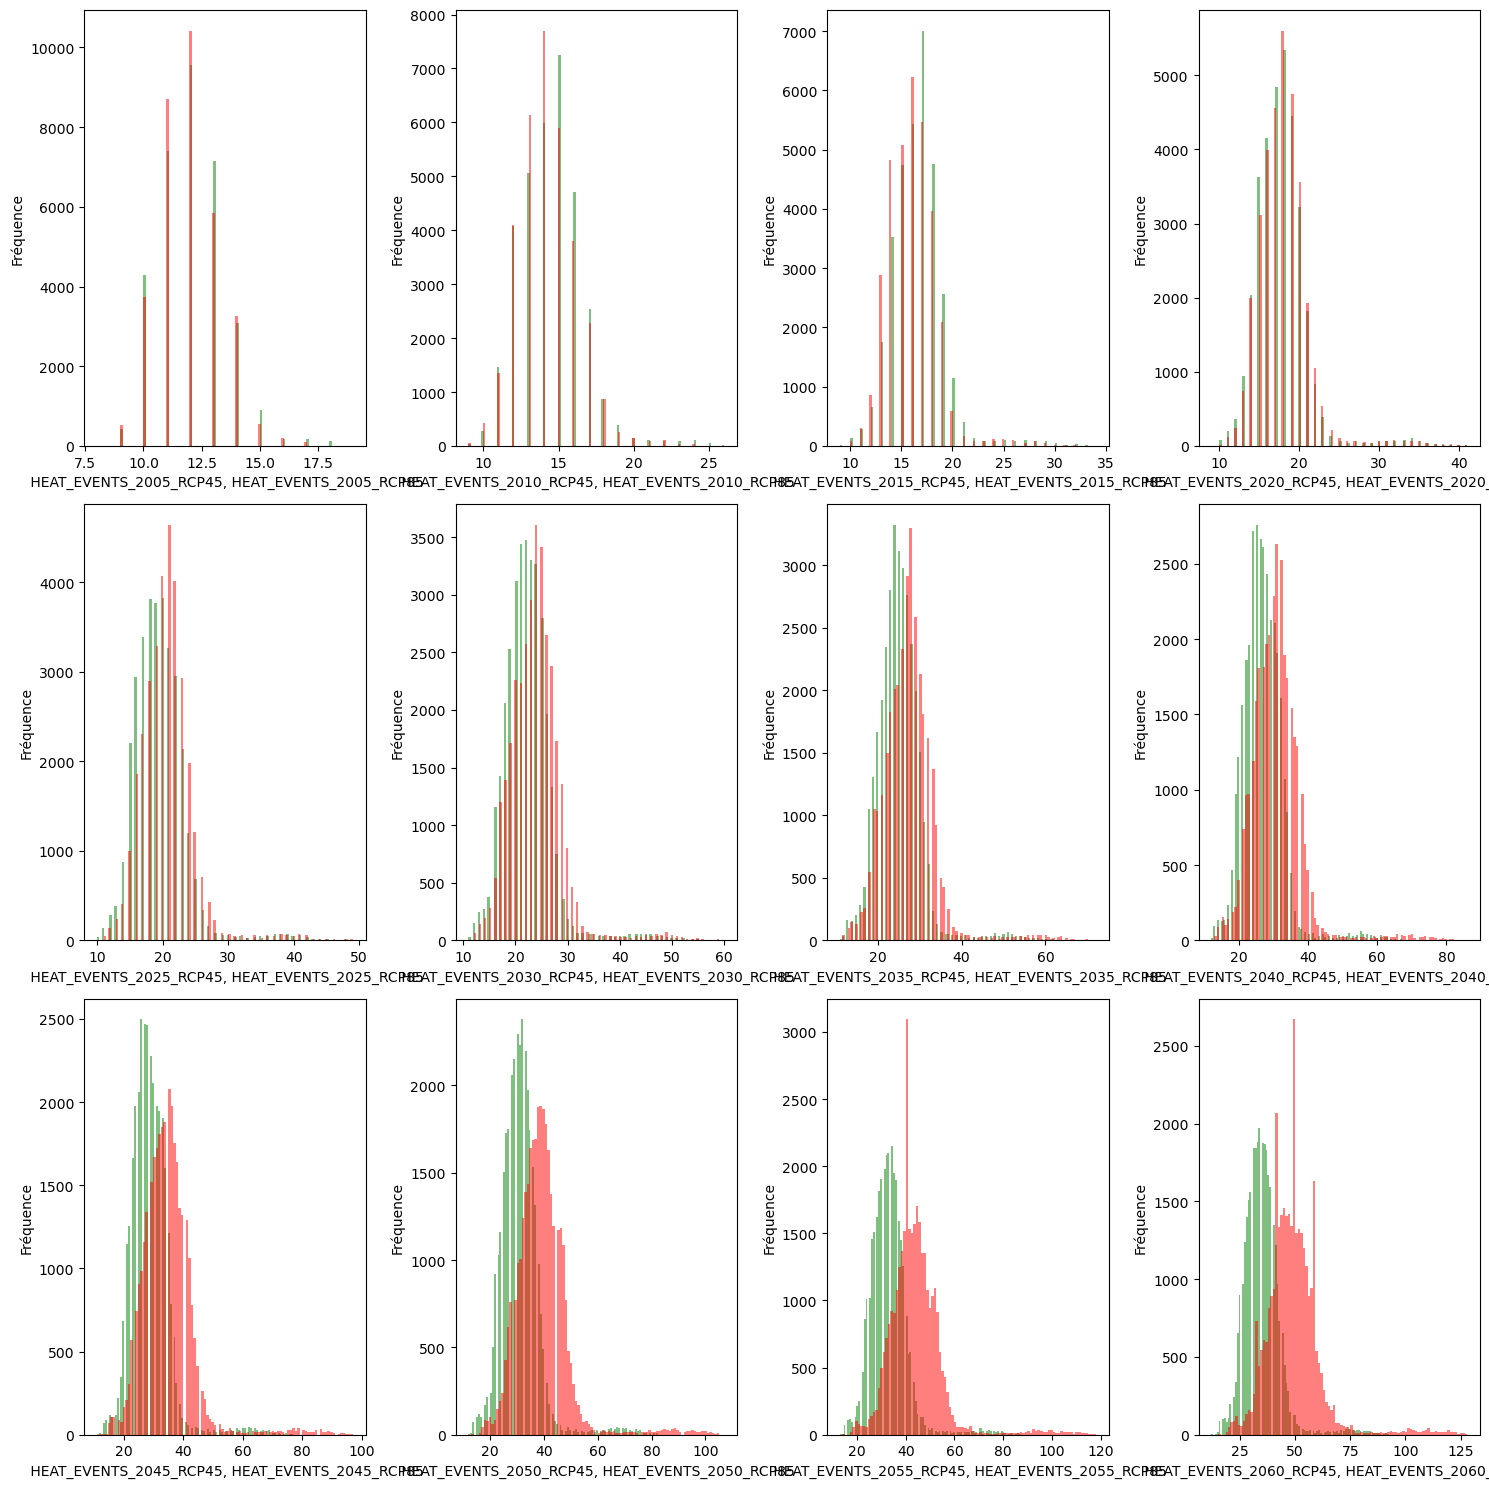

In [36]:
plot_startbyname_histograms_superposed(df, "HEAT_EVENTS")

#### 2.2 PRECIP_TOTALS : Total amount of rain during downpours, per year: average around target year

In [37]:
df.filter(regex=r"PRECIP_TOTALS").describe()

,PRECIP_TOTALS_1970_IN,PRECIP_TOTALS_1975_IN,PRECIP_TOTALS_1980_IN,PRECIP_TOTALS_1985_IN,PRECIP_TOTALS_1990_IN,PRECIP_TOTALS_1995_IN,PRECIP_TOTALS_2000_IN,PRECIP_TOTALS_2005_RCP45_IN,PRECIP_TOTALS_2010_RCP45_IN,PRECIP_TOTALS_2015_RCP45_IN,...,PRECIP_TOTALS_2015_RCP85_IN,PRECIP_TOTALS_2020_RCP85_IN,PRECIP_TOTALS_2025_RCP85_IN,PRECIP_TOTALS_2030_RCP85_IN,PRECIP_TOTALS_2035_RCP85_IN,PRECIP_TOTALS_2040_RCP85_IN,PRECIP_TOTALS_2045_RCP85_IN,PRECIP_TOTALS_2050_RCP85_IN,PRECIP_TOTALS_2055_RCP85_IN,PRECIP_TOTALS_2060_RCP85_IN
count,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,...,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000
mean,15.851670,15.857568,15.835520,15.926763,15.804856,15.976258,16.413054,16.585480,16.949925,17.169327,...,16.972051,17.229078,17.525144,17.608165,17.637619,17.911387,18.192048,18.367057,18.629090,18.721303
std,5.271031,5.292315,5.348179,5.320428,5.198577,5.227177,5.377030,5.386933,5.462926,5.603528,...,5.573190,5.621645,5.693614,5.717535,5.788513,5.872609,5.924884,6.047706,6.143654,6.108608
min,1.900000,1.900000,1.800000,1.800000,1.800000,1.900000,1.900000,1.800000,1.900000,1.800000,...,1.800000,1.800000,1.900000,1.900000,1.800000,1.800000,1.800000,1.800000,1.700000,1.700000
25%,13.100000,13.000000,13.000000,13.100000,13.100000,13.200000,13.500000,13.900000,14.200000,14.300000,...,14.000000,14.200000,14.400000,14.600000,14.600000,14.900000,15.300000,15.200000,15.500000,15.700000
50%,16.000000,15.900000,15.800000,16.050000,16.000000,16.300000,16.700000,16.900000,17.400000,17.600000,...,17.200000,17.600000,18.000000,18.000000,18.100000,18.400000,18.800000,19.100000,19.400000,19.400000
75%,18.500000,18.500000,18.300000,18.600000,18.700000,18.900000,19.600000,19.800000,20.200000,20.600000,...,20.300000,20.600000,21.000000,21.200000,21.300000,21.500000,21.800000,22.200000,22.600000,22.700000
max,86.200000,86.600000,87.600000,88.400000,86.800000,86.500000,89.700000,90.600000,91.800000,93.500000,...,92.700000,94.400000,94.000000,94.000000,96.300000,99.900000,102.100000,103.300000,105.100000,104.900000


['PRECIP_TOTALS_1970_IN', 'PRECIP_TOTALS_1975_IN', 'PRECIP_TOTALS_1980_IN', 'PRECIP_TOTALS_1985_IN', 'PRECIP_TOTALS_1990_IN', 'PRECIP_TOTALS_1995_IN', 'PRECIP_TOTALS_2000_IN', 'PRECIP_TOTALS_2005_RCP45_IN', 'PRECIP_TOTALS_2010_RCP45_IN', 'PRECIP_TOTALS_2015_RCP45_IN', 'PRECIP_TOTALS_2020_RCP45_IN', 'PRECIP_TOTALS_2025_RCP45_IN', 'PRECIP_TOTALS_2030_RCP45_IN', 'PRECIP_TOTALS_2035_RCP45_IN', 'PRECIP_TOTALS_2040_RCP45_IN', 'PRECIP_TOTALS_2045_RCP45_IN', 'PRECIP_TOTALS_2050_RCP45_IN', 'PRECIP_TOTALS_2055_RCP45_IN', 'PRECIP_TOTALS_2060_RCP45_IN']


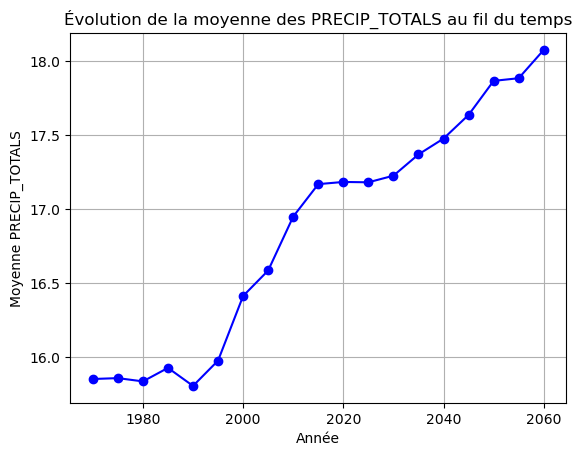

In [38]:
plot_mean_over_time(df,"PRECIP_TOTALS")

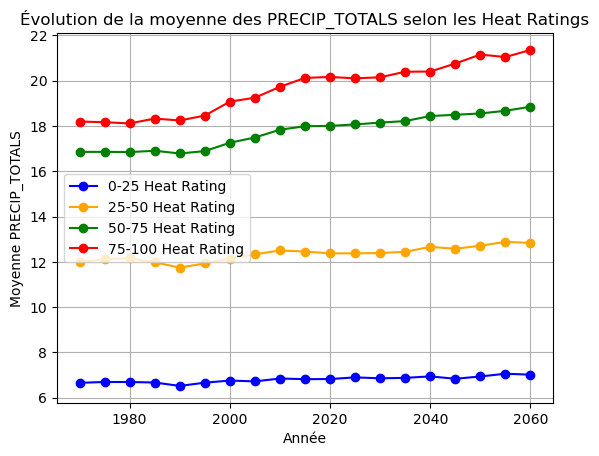

In [39]:
#plot_mean_over_time_by_rating(df,"PRECIP_TOTALS","PRECIP_RATING")
plot_mean_over_time_by_rating(df, "PRECIP_TOTALS","PRECIP_RATING")

Très peu d'évolution au fil du temps mais une valeur plus élevé pour les states ayant des notes plus élevés

Index(['PRECIP_TOTALS_1970_IN', 'PRECIP_TOTALS_1975_IN',
       'PRECIP_TOTALS_1980_IN', 'PRECIP_TOTALS_1985_IN',
       'PRECIP_TOTALS_1990_IN', 'PRECIP_TOTALS_1995_IN',
       'PRECIP_TOTALS_2000_IN', 'PRECIP_TOTALS_2005_RCP45_IN',
       'PRECIP_TOTALS_2010_RCP45_IN', 'PRECIP_TOTALS_2015_RCP45_IN',
       'PRECIP_TOTALS_2020_RCP45_IN', 'PRECIP_TOTALS_2025_RCP45_IN',
       'PRECIP_TOTALS_2030_RCP45_IN', 'PRECIP_TOTALS_2035_RCP45_IN',
       'PRECIP_TOTALS_2040_RCP45_IN', 'PRECIP_TOTALS_2045_RCP45_IN',
       'PRECIP_TOTALS_2050_RCP45_IN', 'PRECIP_TOTALS_2055_RCP45_IN',
       'PRECIP_TOTALS_2060_RCP45_IN', 'PRECIP_TOTALS_2005_RCP85_IN',
       'PRECIP_TOTALS_2010_RCP85_IN', 'PRECIP_TOTALS_2015_RCP85_IN',
       'PRECIP_TOTALS_2020_RCP85_IN', 'PRECIP_TOTALS_2025_RCP85_IN',
       'PRECIP_TOTALS_2030_RCP85_IN', 'PRECIP_TOTALS_2035_RCP85_IN',
       'PRECIP_TOTALS_2040_RCP85_IN', 'PRECIP_TOTALS_2045_RCP85_IN',
       'PRECIP_TOTALS_2050_RCP85_IN', 'PRECIP_TOTALS_2055_RCP85_IN',
       

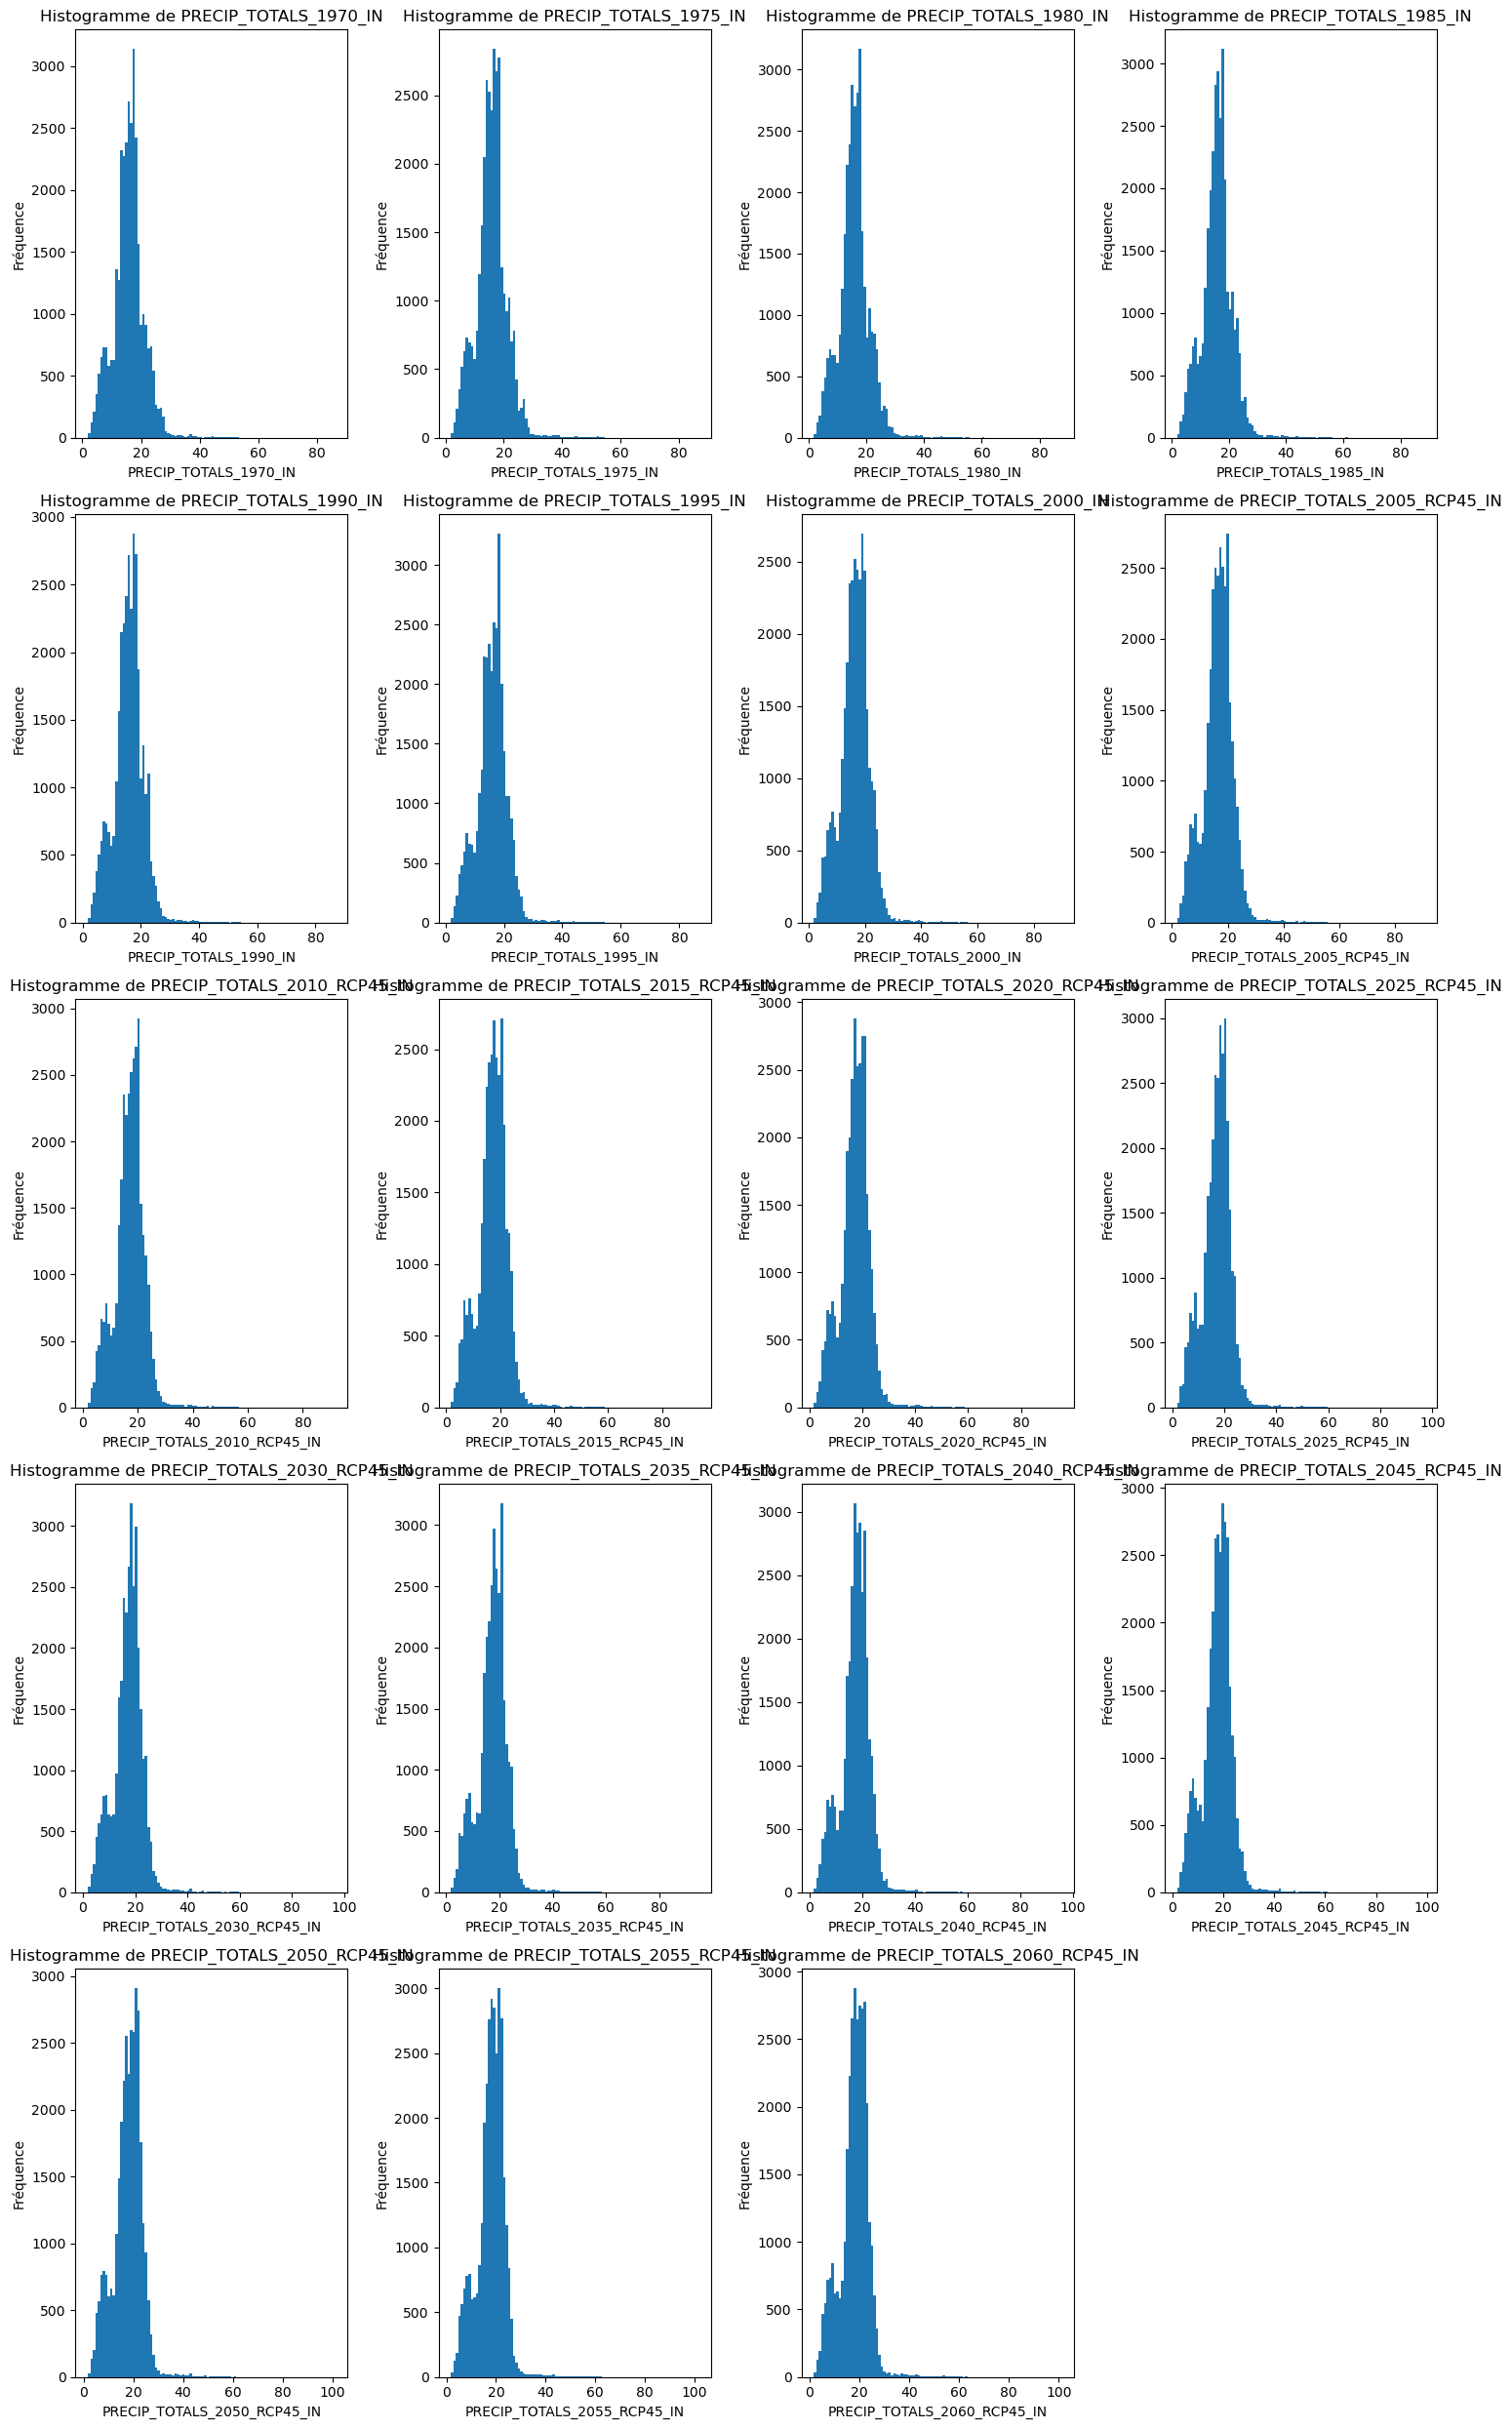

In [40]:
plot_startbyname_histograms(df, "PRECIP_TOTALS")

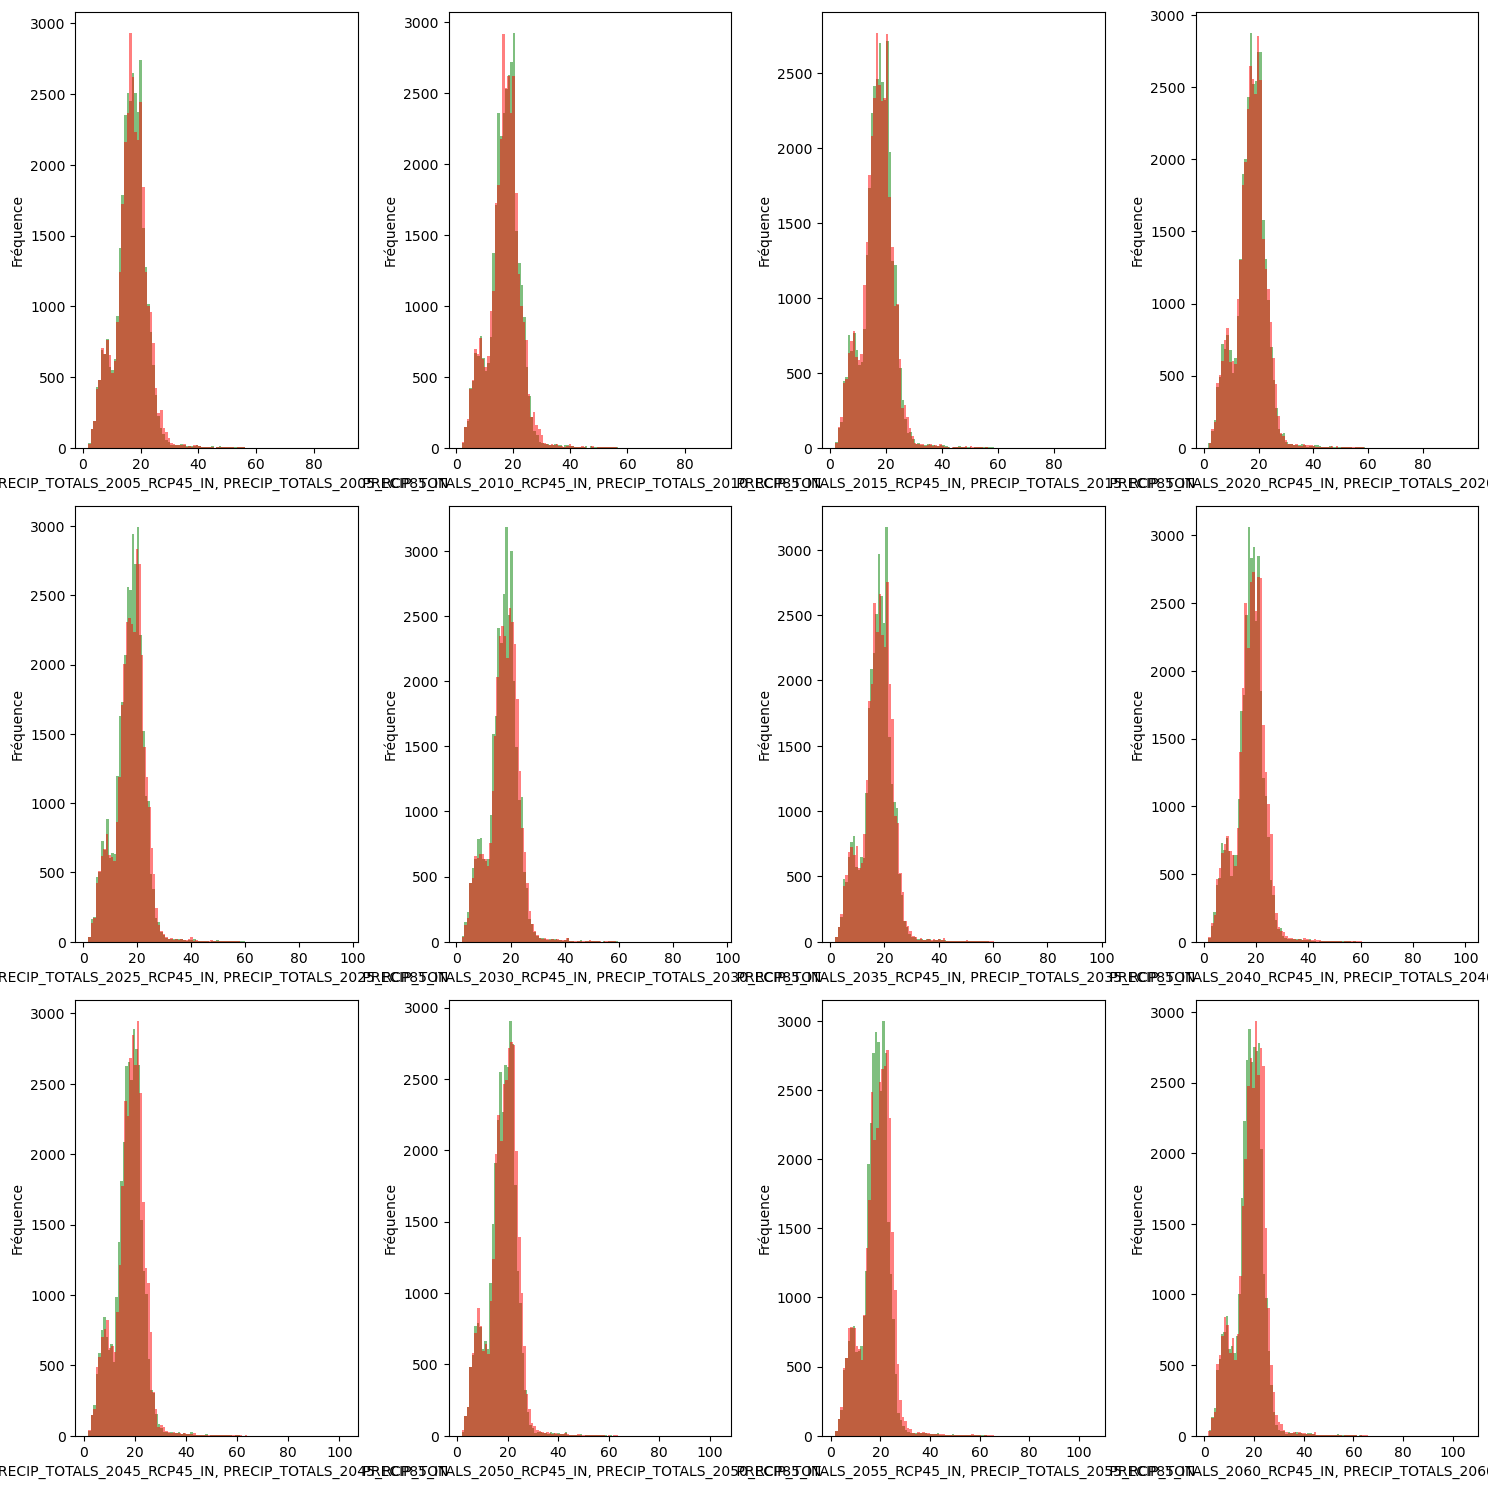

In [42]:
plot_startbyname_histograms_superposed(df, "PRECIP_TOTALS")

Quasi pas de décalage vers la droite pour cette variable

#### 2.3 PRECIP_ANNUAL : Total annual rainfall: average around target year

In [31]:
df.filter(regex=r"PRECIP_ANNUAL").describe()


,PRECIP_ANNUAL_1970_IN,PRECIP_ANNUAL_1975_IN,PRECIP_ANNUAL_1980_IN,PRECIP_ANNUAL_1985_IN,PRECIP_ANNUAL_1990_IN,PRECIP_ANNUAL_1995_IN,PRECIP_ANNUAL_2000_IN,PRECIP_ANNUAL_2005_RCP45_IN,PRECIP_ANNUAL_2010_RCP45_IN,PRECIP_ANNUAL_2015_RCP45_IN,...,PRECIP_ANNUAL_2015_RCP85_IN,PRECIP_ANNUAL_2020_RCP85_IN,PRECIP_ANNUAL_2025_RCP85_IN,PRECIP_ANNUAL_2030_RCP85_IN,PRECIP_ANNUAL_2035_RCP85_IN,PRECIP_ANNUAL_2040_RCP85_IN,PRECIP_ANNUAL_2045_RCP85_IN,PRECIP_ANNUAL_2050_RCP85_IN,PRECIP_ANNUAL_2055_RCP85_IN,PRECIP_ANNUAL_2060_RCP85_IN
count,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,...,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000,33300.000000
mean,38.075559,38.015724,37.957039,38.038553,37.776396,37.997973,38.569988,38.554769,38.871030,39.183724,...,38.759177,39.026610,39.386369,39.289961,39.191213,39.531084,39.737670,39.760688,39.961745,39.918928
std,13.442096,13.352404,13.402911,13.478411,13.349888,13.369192,13.570053,13.504725,13.607973,13.859331,...,13.700037,13.775195,13.844851,13.780076,13.824134,13.939656,13.996062,14.107425,14.166074,14.062119
min,2.200000,2.200000,2.100000,2.200000,2.100000,2.200000,2.200000,2.100000,2.200000,2.100000,...,2.100000,2.100000,2.200000,2.200000,2.100000,2.100000,2.100000,2.100000,2.000000,2.000000
25%,31.200000,31.200000,31.100000,31.100000,31.000000,31.100000,31.500000,31.900000,32.100000,32.200000,...,31.700000,31.900000,32.100000,32.200000,32.100000,32.500000,32.800000,32.600000,32.700000,32.800000
50%,39.900000,39.800000,39.600000,39.900000,39.700000,40.000000,40.700000,40.600000,41.100000,41.400000,...,40.900000,41.300000,41.700000,41.600000,41.500000,41.900000,42.200000,42.300000,42.600000,42.600000
75%,46.300000,46.200000,46.200000,46.400000,46.300000,46.600000,47.400000,47.300000,47.700000,48.300000,...,47.800000,48.100000,48.600000,48.700000,48.500000,48.700000,48.900000,49.400000,49.900000,49.700000
max,197.400000,196.700000,197.300000,198.500000,196.500000,195.900000,197.800000,197.500000,198.400000,201.000000,...,199.800000,201.300000,200.200000,199.900000,202.100000,205.900000,207.300000,206.900000,208.000000,207.000000


['PRECIP_ANNUAL_1970_IN', 'PRECIP_ANNUAL_1975_IN', 'PRECIP_ANNUAL_1980_IN', 'PRECIP_ANNUAL_1985_IN', 'PRECIP_ANNUAL_1990_IN', 'PRECIP_ANNUAL_1995_IN', 'PRECIP_ANNUAL_2000_IN', 'PRECIP_ANNUAL_2005_RCP45_IN', 'PRECIP_ANNUAL_2010_RCP45_IN', 'PRECIP_ANNUAL_2015_RCP45_IN', 'PRECIP_ANNUAL_2020_RCP45_IN', 'PRECIP_ANNUAL_2025_RCP45_IN', 'PRECIP_ANNUAL_2030_RCP45_IN', 'PRECIP_ANNUAL_2035_RCP45_IN', 'PRECIP_ANNUAL_2040_RCP45_IN', 'PRECIP_ANNUAL_2045_RCP45_IN', 'PRECIP_ANNUAL_2050_RCP45_IN', 'PRECIP_ANNUAL_2055_RCP45_IN', 'PRECIP_ANNUAL_2060_RCP45_IN']


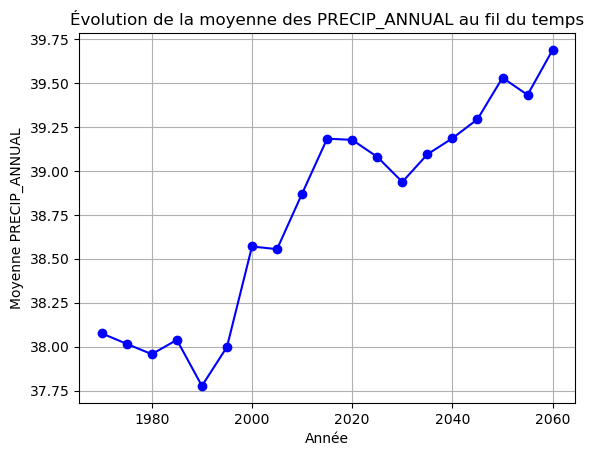

In [32]:
plot_mean_over_time(df,"PRECIP_ANNUAL")

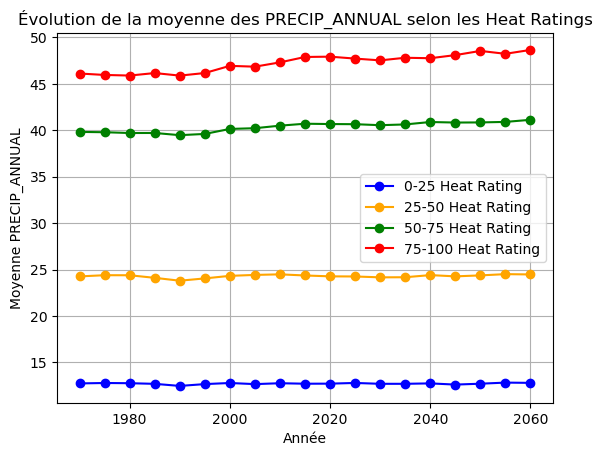

In [43]:
plot_mean_over_time_by_rating(df,"PRECIP_ANNUAL", "PRECIP_RATING")

Index(['PRECIP_ANNUAL_1970_IN', 'PRECIP_ANNUAL_1975_IN',
       'PRECIP_ANNUAL_1980_IN', 'PRECIP_ANNUAL_1985_IN',
       'PRECIP_ANNUAL_1990_IN', 'PRECIP_ANNUAL_1995_IN',
       'PRECIP_ANNUAL_2000_IN', 'PRECIP_ANNUAL_2005_RCP45_IN',
       'PRECIP_ANNUAL_2010_RCP45_IN', 'PRECIP_ANNUAL_2015_RCP45_IN',
       'PRECIP_ANNUAL_2020_RCP45_IN', 'PRECIP_ANNUAL_2025_RCP45_IN',
       'PRECIP_ANNUAL_2030_RCP45_IN', 'PRECIP_ANNUAL_2035_RCP45_IN',
       'PRECIP_ANNUAL_2040_RCP45_IN', 'PRECIP_ANNUAL_2045_RCP45_IN',
       'PRECIP_ANNUAL_2050_RCP45_IN', 'PRECIP_ANNUAL_2055_RCP45_IN',
       'PRECIP_ANNUAL_2060_RCP45_IN', 'PRECIP_ANNUAL_2005_RCP85_IN',
       'PRECIP_ANNUAL_2010_RCP85_IN', 'PRECIP_ANNUAL_2015_RCP85_IN',
       'PRECIP_ANNUAL_2020_RCP85_IN', 'PRECIP_ANNUAL_2025_RCP85_IN',
       'PRECIP_ANNUAL_2030_RCP85_IN', 'PRECIP_ANNUAL_2035_RCP85_IN',
       'PRECIP_ANNUAL_2040_RCP85_IN', 'PRECIP_ANNUAL_2045_RCP85_IN',
       'PRECIP_ANNUAL_2050_RCP85_IN', 'PRECIP_ANNUAL_2055_RCP85_IN',
       

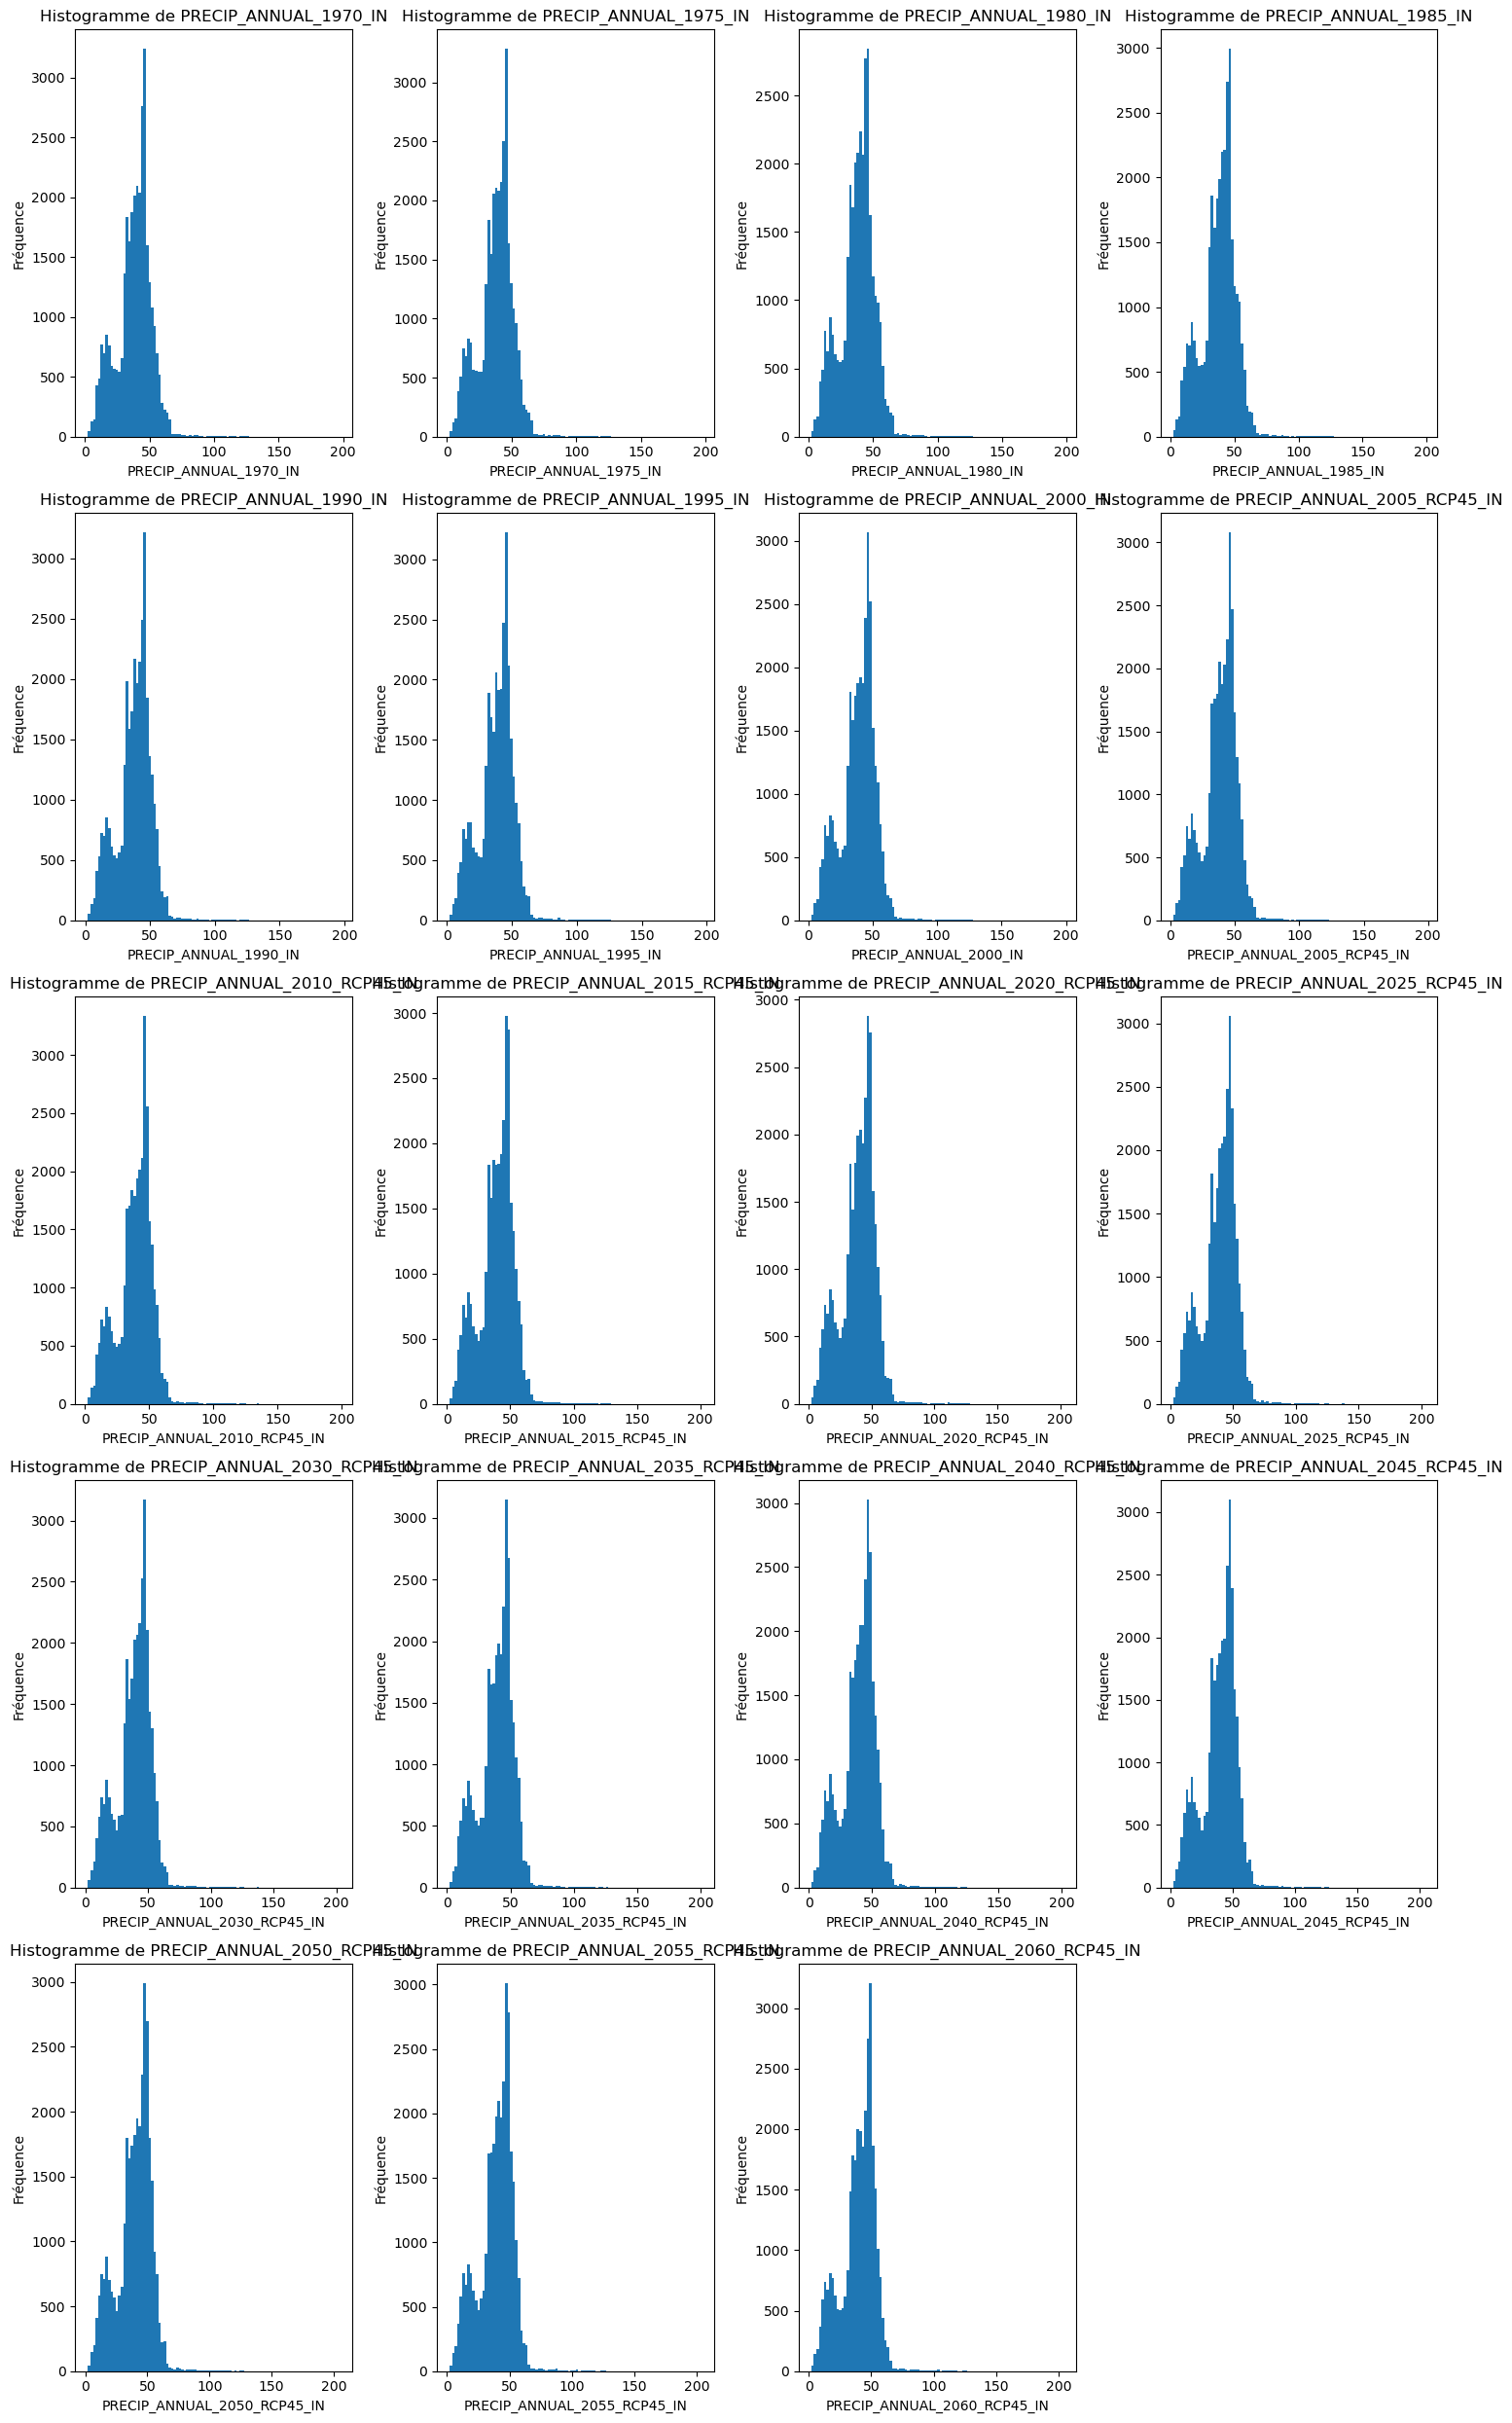

In [33]:
plot_startbyname_histograms(df, "PRECIP_ANNUAL")

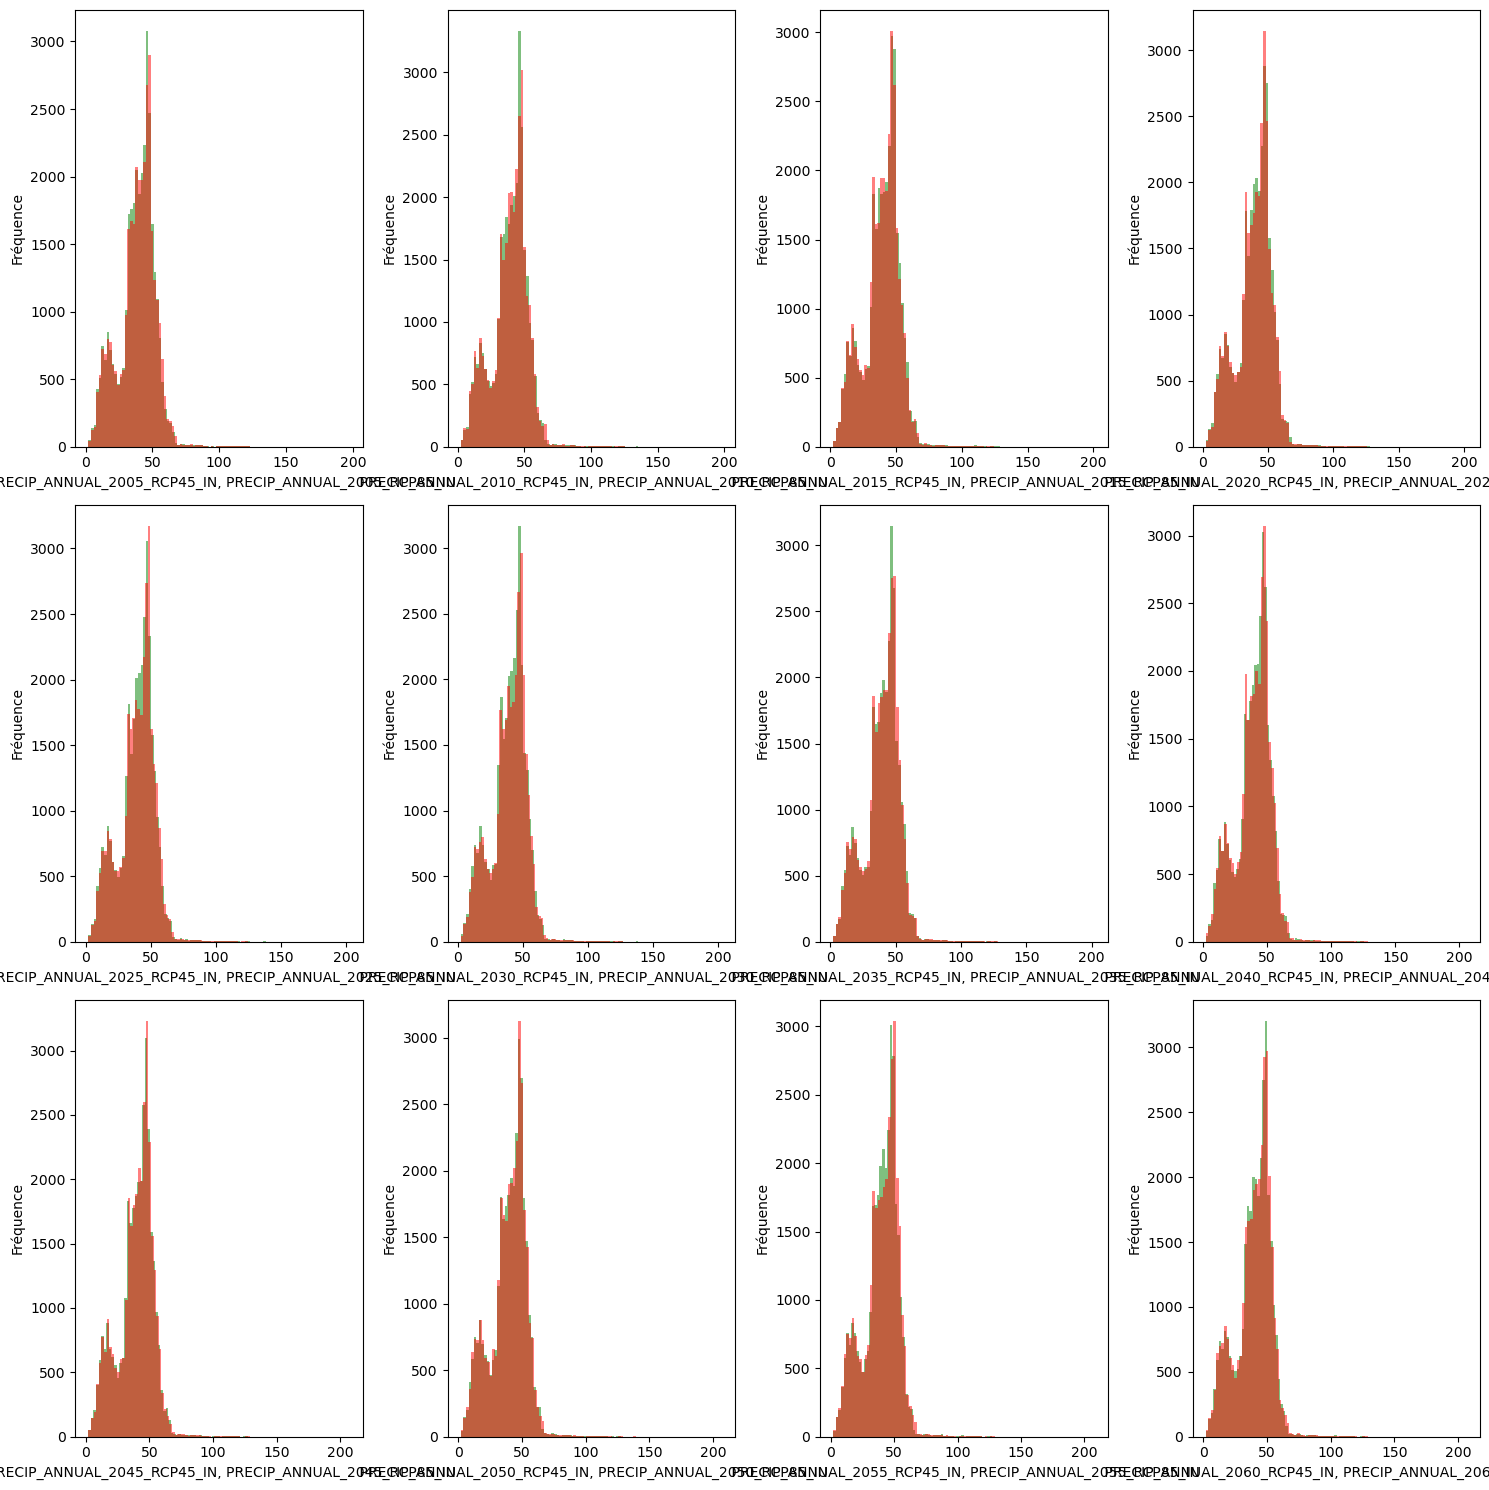

In [46]:
plot_startbyname_histograms_superposed(df, "PRECIP_ANNUAL")

Quasi pas de décalage donc pas de différence pour les scénarios de forte ou faible émissions de gaz à effet de serre

### 3. DROUGHT (secheresse)

In [34]:
df.filter(regex=r'DROUGHT').columns

Index(['DROUGHT_RATING', 'DROUGHT_WASSI_2015', 'DROUGHT_WASSI_2020_RCP85',
       'DROUGHT_WASSI_2025_RCP85', 'DROUGHT_WASSI_2030_RCP85',
       'DROUGHT_WASSI_2035_RCP85', 'DROUGHT_WASSI_2040_RCP85',
       'DROUGHT_WASSI_2045_RCP85', 'DROUGHT_WASSI_2050_RCP85',
       'DROUGHT_WASSI_2055_RCP85', 'DROUGHT_WASSI_2060_RCP85',
       'DROUGHT_WASSI_2020_RCP45', 'DROUGHT_WASSI_2025_RCP45',
       'DROUGHT_WASSI_2030_RCP45', 'DROUGHT_WASSI_2035_RCP45',
       'DROUGHT_WASSI_2040_RCP45', 'DROUGHT_WASSI_2045_RCP45',
       'DROUGHT_WASSI_2050_RCP45', 'DROUGHT_WASSI_2055_RCP45',
       'DROUGHT_WASSI_2060_RCP45', 'DROUGHT_LENGTH_1970_MONTHS',
       'DROUGHT_LENGTH_1975_MONTHS', 'DROUGHT_LENGTH_1980_MONTHS',
       'DROUGHT_LENGTH_1985_MONTHS', 'DROUGHT_LENGTH_1990_MONTHS',
       'DROUGHT_LENGTH_1995_MONTHS', 'DROUGHT_LENGTH_2000_MONTHS',
       'DROUGHT_LENGTH_2005_MONTHS', 'DROUGHT_LENGTH_2010_MONTHS',
       'DROUGHT_LENGTH_2015_MONTHS', 'DROUGHT_LENGTH_2020_MONTHS',
       'DROUGHT_LENGT

On a une note du risque de secheresse comprise entre 0 et 100 donée par ClimateCheck pour chaque ville

### 4. FIRE 

In [35]:
colonne_fire = np.array([col for col in df.columns if "FIR" in col])
colonne_fire


array(['FRACTION_WITH_FIRE_RISK', 'FIRE_RATING', 'FIRE_RATING_P25',
       'FIRE_RATING_P75', 'FIRE_CHANCE_30YR', 'FIRE_CHANCE_30YR_P25',
       'FIRE_CHANCE_30YR_P75', 'FIRE_FLEP4', 'FIRE_FLEP4_P25',
       'FIRE_FLEP4_P75', 'FIRE_FLEP8', 'FIRE_FLEP8_P25', 'FIRE_FLEP8_P75',
       'FIRE_MAGNITUDE_1970_FWI', 'FIRE_MAGNITUDE_1975_FWI',
       'FIRE_MAGNITUDE_1980_FWI', 'FIRE_MAGNITUDE_1985_FWI',
       'FIRE_MAGNITUDE_1990_FWI', 'FIRE_MAGNITUDE_1995_FWI',
       'FIRE_MAGNITUDE_2000_FWI', 'FIRE_MAGNITUDE_2005_RCP85_FWI',
       'FIRE_MAGNITUDE_2010_RCP85_FWI', 'FIRE_MAGNITUDE_2015_RCP85_FWI',
       'FIRE_MAGNITUDE_2020_RCP85_FWI', 'FIRE_MAGNITUDE_2025_RCP85_FWI',
       'FIRE_MAGNITUDE_2030_RCP85_FWI', 'FIRE_MAGNITUDE_2035_RCP85_FWI',
       'FIRE_MAGNITUDE_2040_RCP85_FWI', 'FIRE_MAGNITUDE_2045_RCP85_FWI',
       'FIRE_MAGNITUDE_2050_RCP85_FWI', 'FIRE_MAGNITUDE_2055_RCP85_FWI',
       'FIRE_MAGNITUDE_2060_RCP85_FWI', 'FIRE_MAGNITUDE_2005_RCP45_FWI',
       'FIRE_MAGNITUDE_2010_RCP45_FW

Index(['FIRE_MAGNITUDE_1970_FWI', 'FIRE_MAGNITUDE_1975_FWI',
       'FIRE_MAGNITUDE_1980_FWI', 'FIRE_MAGNITUDE_1985_FWI',
       'FIRE_MAGNITUDE_1990_FWI', 'FIRE_MAGNITUDE_1995_FWI',
       'FIRE_MAGNITUDE_2000_FWI', 'FIRE_MAGNITUDE_2005_RCP85_FWI',
       'FIRE_MAGNITUDE_2010_RCP85_FWI', 'FIRE_MAGNITUDE_2015_RCP85_FWI',
       'FIRE_MAGNITUDE_2020_RCP85_FWI', 'FIRE_MAGNITUDE_2025_RCP85_FWI',
       'FIRE_MAGNITUDE_2030_RCP85_FWI', 'FIRE_MAGNITUDE_2035_RCP85_FWI',
       'FIRE_MAGNITUDE_2040_RCP85_FWI', 'FIRE_MAGNITUDE_2045_RCP85_FWI',
       'FIRE_MAGNITUDE_2050_RCP85_FWI', 'FIRE_MAGNITUDE_2055_RCP85_FWI',
       'FIRE_MAGNITUDE_2060_RCP85_FWI', 'FIRE_MAGNITUDE_2005_RCP45_FWI',
       'FIRE_MAGNITUDE_2010_RCP45_FWI', 'FIRE_MAGNITUDE_2015_RCP45_FWI',
       'FIRE_MAGNITUDE_2020_RCP45_FWI', 'FIRE_MAGNITUDE_2025_RCP45_FWI',
       'FIRE_MAGNITUDE_2030_RCP45_FWI', 'FIRE_MAGNITUDE_2035_RCP45_FWI',
       'FIRE_MAGNITUDE_2040_RCP45_FWI', 'FIRE_MAGNITUDE_2045_RCP45_FWI',
       'FIRE_MAGNITU

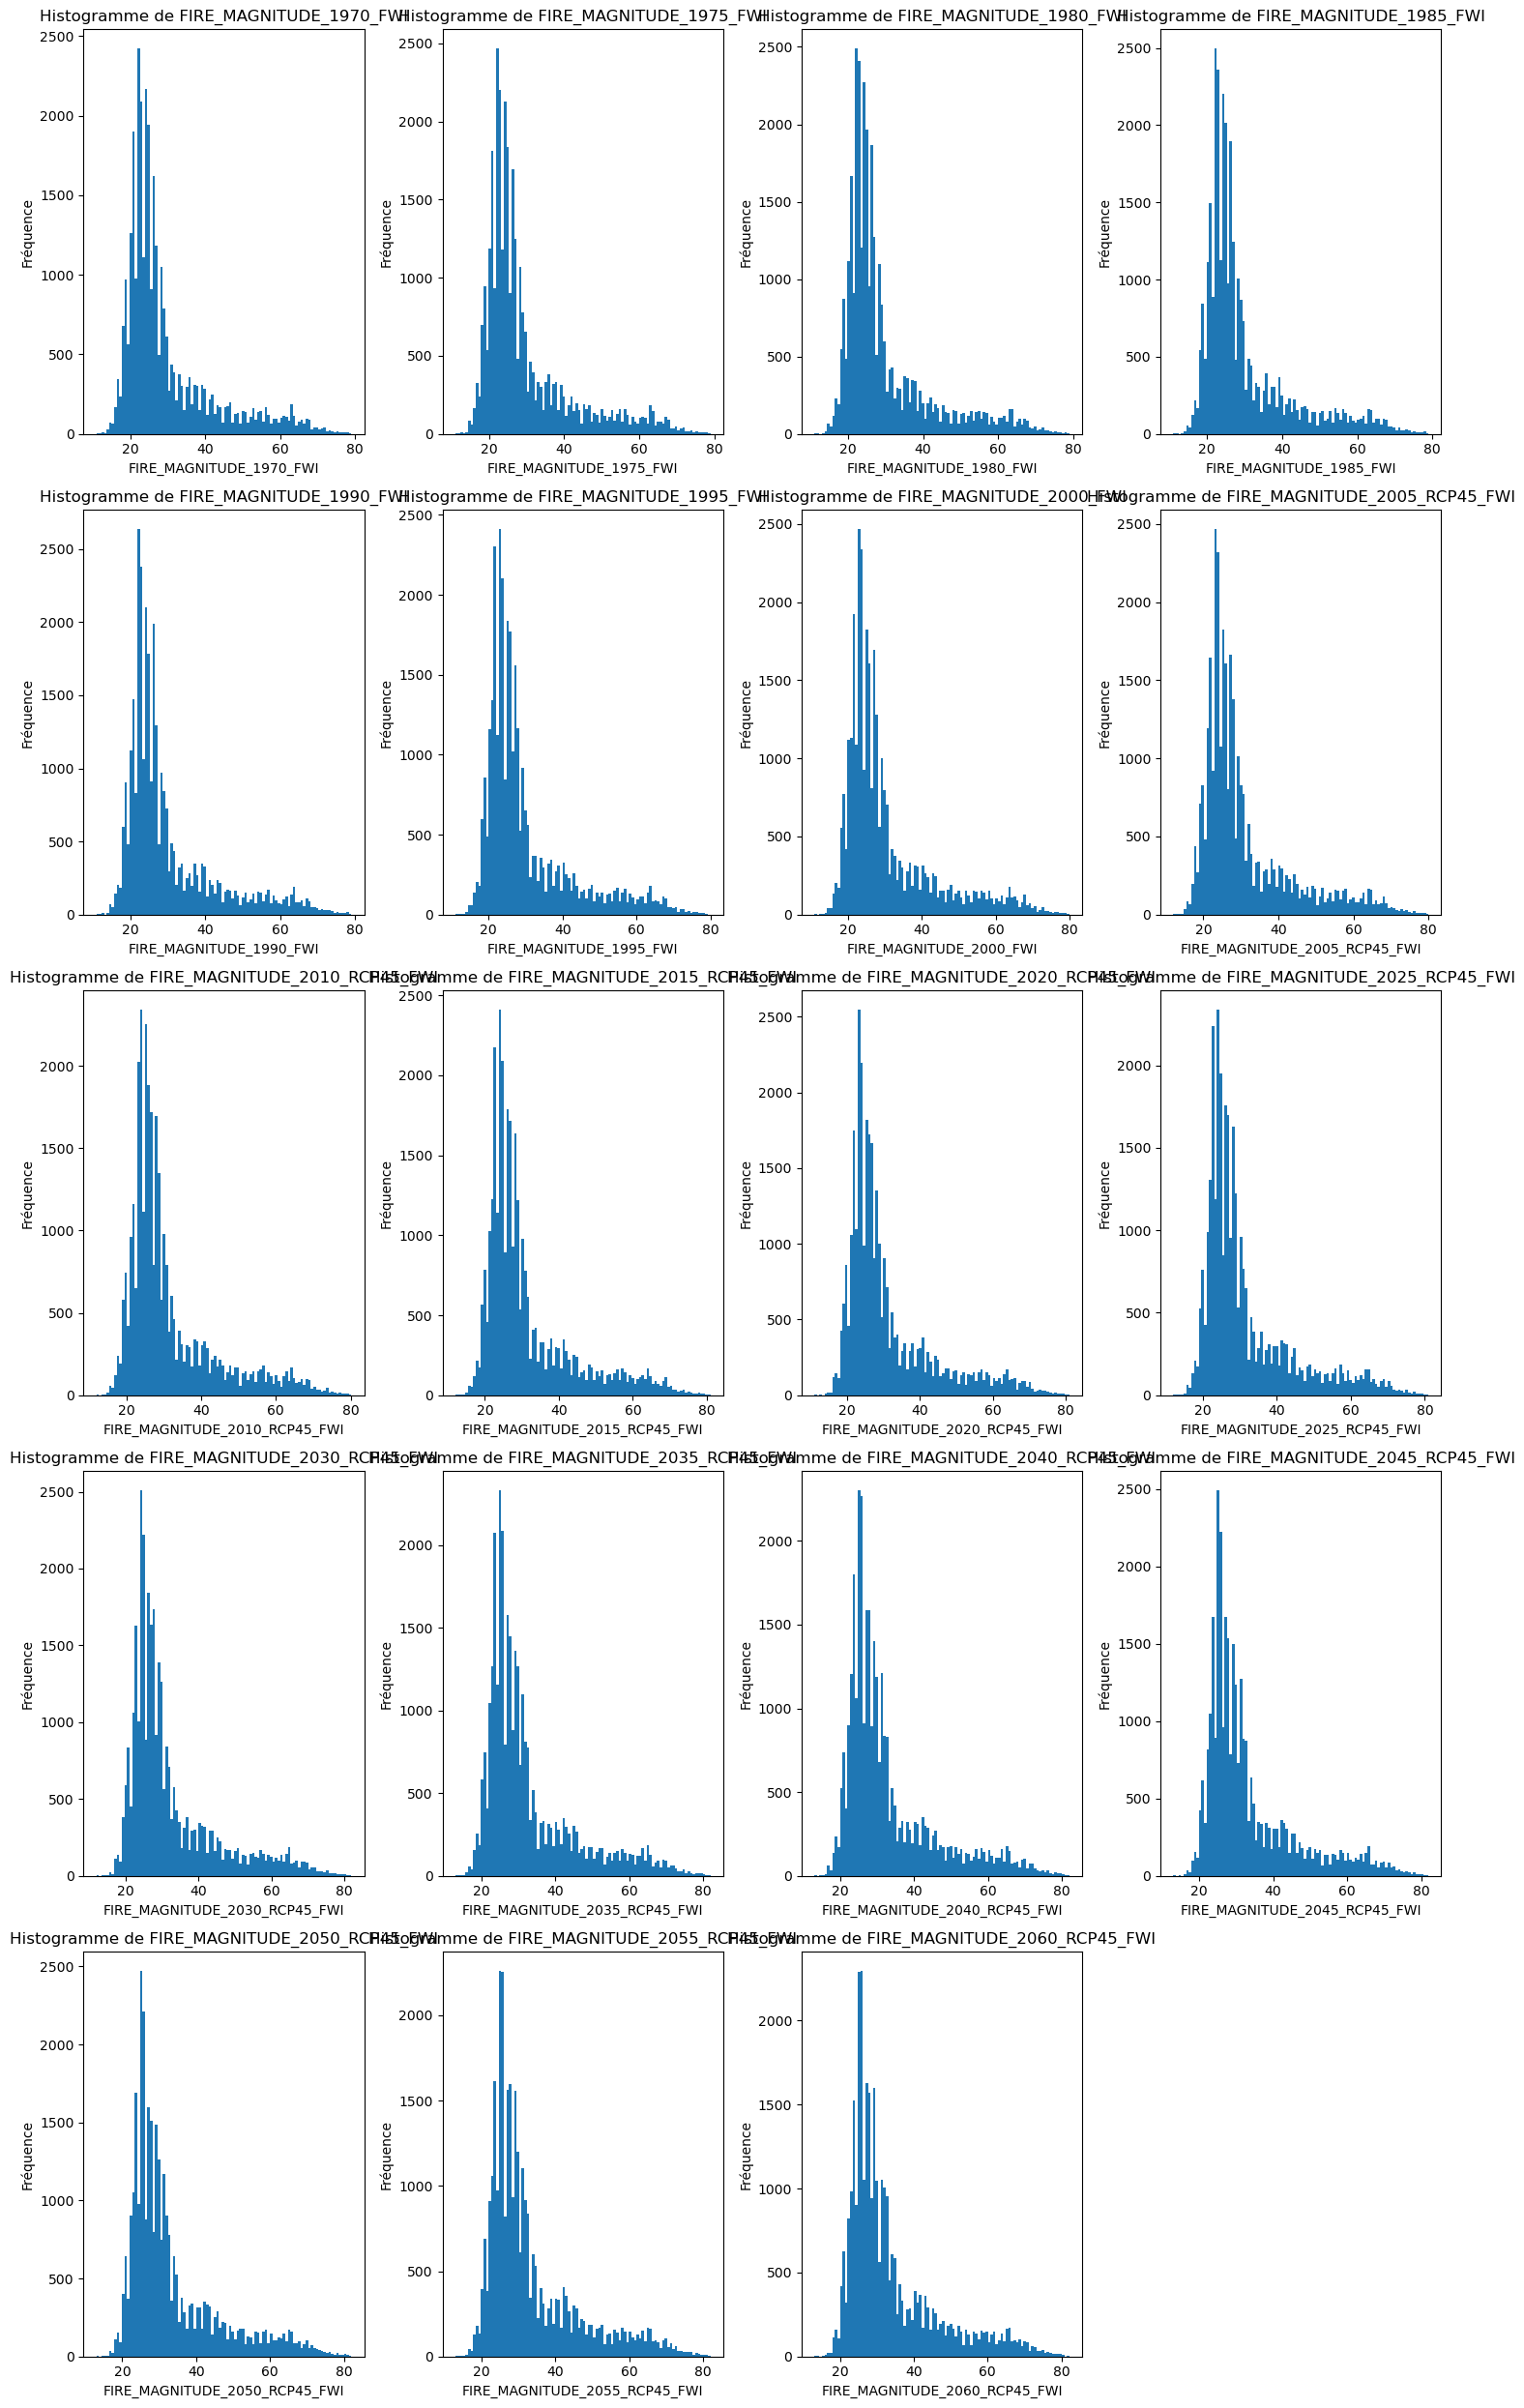

In [36]:
plot_startbyname_histograms(df, "FIRE_MAGNITUDE")

['FIRE_MAGNITUDE_1970_FWI', 'FIRE_MAGNITUDE_1975_FWI', 'FIRE_MAGNITUDE_1980_FWI', 'FIRE_MAGNITUDE_1985_FWI', 'FIRE_MAGNITUDE_1990_FWI', 'FIRE_MAGNITUDE_1995_FWI', 'FIRE_MAGNITUDE_2000_FWI', 'FIRE_MAGNITUDE_2005_RCP45_FWI', 'FIRE_MAGNITUDE_2010_RCP45_FWI', 'FIRE_MAGNITUDE_2015_RCP45_FWI', 'FIRE_MAGNITUDE_2020_RCP45_FWI', 'FIRE_MAGNITUDE_2025_RCP45_FWI', 'FIRE_MAGNITUDE_2030_RCP45_FWI', 'FIRE_MAGNITUDE_2035_RCP45_FWI', 'FIRE_MAGNITUDE_2040_RCP45_FWI', 'FIRE_MAGNITUDE_2045_RCP45_FWI', 'FIRE_MAGNITUDE_2050_RCP45_FWI', 'FIRE_MAGNITUDE_2055_RCP45_FWI', 'FIRE_MAGNITUDE_2060_RCP45_FWI']


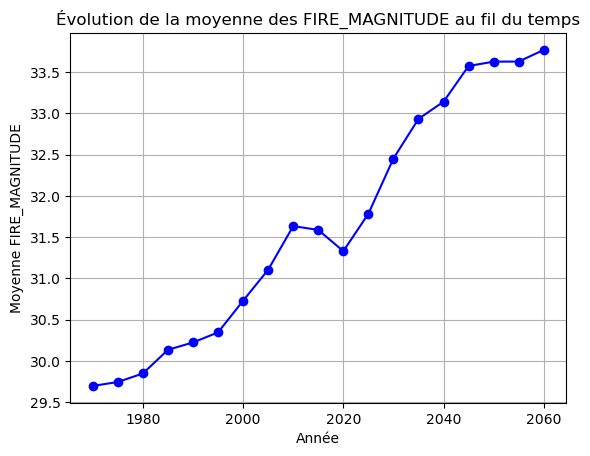

In [37]:
plot_mean_over_time(df,"FIRE_MAGNITUDE")

### 5. FLOOD (innondation)

In [38]:
colonne_flood = np.array([col for col in df.columns if "FLOOD" in col])
colonne_flood


array(['FRACTION_WITH_FLOOD_RISK', 'FRACTION_WITH_FLOOD_DEFENSE',
       'FLOOD_RATING', 'FLOOD_RATING_P25', 'FLOOD_RATING_P75',
       'FLOOD_STORM_SURGE_RATING', 'FLOOD_STORM_SURGE_RATING_P25',
       'FLOOD_STORM_SURGE_RATING_P75', 'FLOOD_STORM_SURGE_DEPTH_30YR_IN',
       'FLOOD_STORM_SURGE_DEPTH_30YR_IN_P25',
       'FLOOD_STORM_SURGE_DEPTH_30YR_IN_P75',
       'FLOOD_STORM_SURGE_CHANCE_30YR', 'FLOOD_FLUVIAL_RATING',
       'FLOOD_FLUVIAL_RATING_P25', 'FLOOD_FLUVIAL_RATING_P75',
       'FLOOD_FLUVIAL_DEPTH_30YR_IN', 'FLOOD_FLUVIAL_DEPTH_30YR_IN_P25',
       'FLOOD_FLUVIAL_DEPTH_30YR_IN_P75', 'FLOOD_FLUVIAL_CHANCE_30YR',
       'FLOOD_FLUVIAL_CHANCE_30YR_P25', 'FLOOD_FLUVIAL_CHANCE_30YR_P75',
       'FLOOD_PLUVIAL_RATING', 'FLOOD_PLUVIAL_RATING_P25',
       'FLOOD_PLUVIAL_RATING_P75', 'FLOOD_PLUVIAL_DEPTH_30YR_IN',
       'FLOOD_PLUVIAL_DEPTH_30YR_IN_P25',
       'FLOOD_PLUVIAL_DEPTH_30YR_IN_P75', 'FLOOD_PLUVIAL_CHANCE_30YR',
       'FLOOD_PLUVIAL_CHANCE_30YR_P25', 'FLOOD_PLUVIAL_C

#### 5.1 FLOOD STORM SURGE (innondation)

Index(['FLOOD_TIDAL_EVENTS_2010', 'FLOOD_TIDAL_EVENTS_2010_P25',
       'FLOOD_TIDAL_EVENTS_2010_P75', 'FLOOD_TIDAL_EVENTS_2020',
       'FLOOD_TIDAL_EVENTS_2020_P25', 'FLOOD_TIDAL_EVENTS_2020_P75',
       'FLOOD_TIDAL_EVENTS_2040', 'FLOOD_TIDAL_EVENTS_2040_P25',
       'FLOOD_TIDAL_EVENTS_2040_P75', 'FLOOD_TIDAL_EVENTS_2050',
       'FLOOD_TIDAL_EVENTS_2050_P25', 'FLOOD_TIDAL_EVENTS_2050_P75',
       'FLOOD_TIDAL_EVENTS_2060', 'FLOOD_TIDAL_EVENTS_2060_P25',
       'FLOOD_TIDAL_EVENTS_2060_P75', 'FLOOD_TIDAL_EVENTS_2070',
       'FLOOD_TIDAL_EVENTS_2070_P25', 'FLOOD_TIDAL_EVENTS_2070_P75',
       'FLOOD_TIDAL_EVENTS_2080', 'FLOOD_TIDAL_EVENTS_2080_P25',
       'FLOOD_TIDAL_EVENTS_2080_P75', 'FLOOD_TIDAL_EVENTS_2090',
       'FLOOD_TIDAL_EVENTS_2090_P25', 'FLOOD_TIDAL_EVENTS_2090_P75',
       'FLOOD_TIDAL_EVENTS_2100', 'FLOOD_TIDAL_EVENTS_2100_P25',
       'FLOOD_TIDAL_EVENTS_2100_P75'],
      dtype='object')


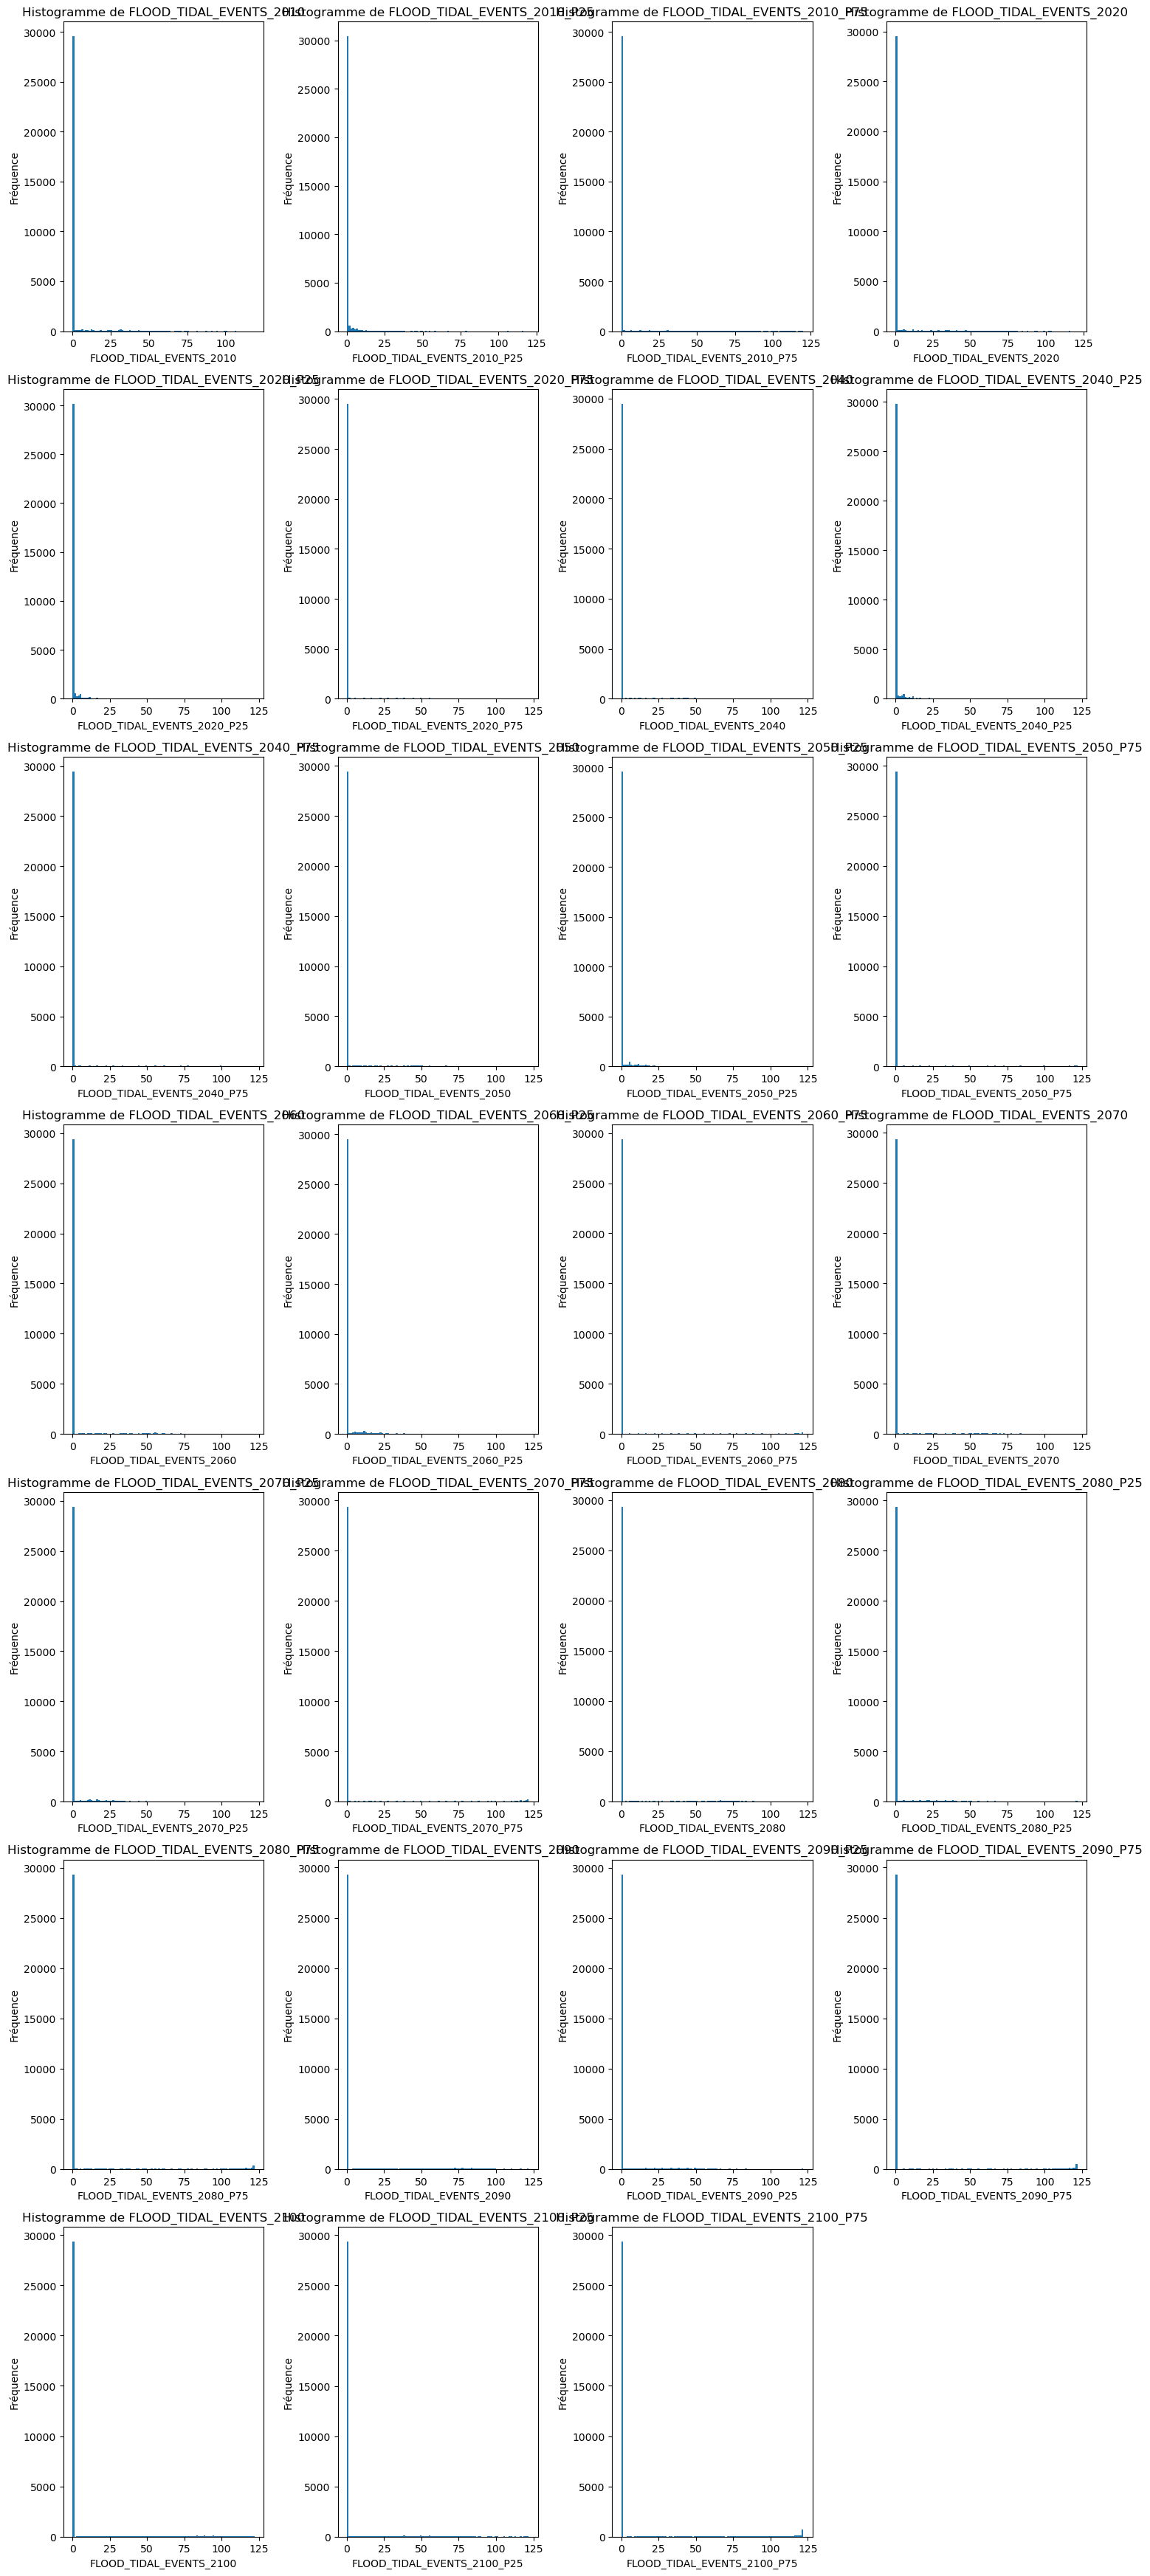

In [39]:
plot_startbyname_histograms(df, "FLOOD_TIDAL_EVENTS")

#### 5.2 FLOOD FLUVIAL

#### 5.2 FLOOD TIDAL 